## Load the markov script

In [2]:
%load_ext autoreload
%autoreload 2
from markov import *

## Adding Text

In [5]:
model = MarkovModel(5)
model.load_file_lines("text/spongebobquotes.txt")
model.map[' you ']

{'s': 4,
 'm': 1,
 't': 4,
 'l': 1,
 'j': 1,
 'w': 1,
 'a': 4,
 'b': 1,
 'h': 1,
 'c': 4,
 'k': 1,
 'e': 1,
 'g': 1}

## Computing Probabilities
The log probabalities sum the examples on the webpage!

In [4]:
model = MarkovModel(6)
model.load_file_lines("text/spongebobquotes.txt")
print(model.get_log_probability("I'm ready, I'm ready"))
print(model.get_log_probability("Artificial Intelligence"))

-40.54528627120139
-69.6038575577757


## Experiment 1: 2016 US Presidental Debate

K that maximizes accuracy: 6
Accuracy: {1: 0.95, 2: 0.9375, 3: 0.9375, 4: 0.9375, 5: 0.9625, 6: 0.9875, 7: 0.9875, 8: 0.9875, 9: 0.9625, 10: 0.9625, 11: 0.925, 12: 0.875, 13: 0.8125, 14: 0.7875, 15: 0.7125, 16: 0.625, 17: 0.625, 18: 0.5875, 19: 0.5625, 20: 0.5625}


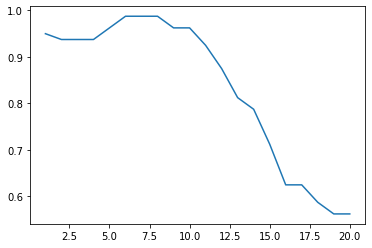


Misclassified for best K

{'truth': 'trump', 'pred': 'clinton', 's': 'Well, if that would happen, because I am pro-life and I will be appointing pro-life judges, I would think that would go back to the individual states.\n\nIf they overturned it, it would go back to the states.\n\nIf we put another two or perhaps three justices on, that is really what will happen. That will happen automatically in my opinion. Because I am putting pro-life justices on the court. I will say this. It will go back to the states and the states will then make a determination.\n\n'}

Best classified under K

{'prob': 0.42853807350740053, 's': "Chris, I think it’s -- I think I should respond. First of all, I had a very good meeting with the President of Mexico. Very nice man. We will be doing very much better with Mexico on trade deals. Believe me. The NAFTA deal signed by her husband is one of the worst deals ever made of any kind signed by anybody. It’s a disaster. Hillary Clinton wanted the wall. Hillary C

In [5]:
import matplotlib.pyplot as plt

K_list = np.arange(1, 21, 1)

accuracy = dict()
results = dict()
for K in K_list:
    results[K] = {}
    results[K]['clas'] = []
    results[K]['misclas'] = []
#     print(f'Testing Markov Model with {K} length prefixes')
    counts = 0
    iterations = 0
    
    trump = MarkovModel(K)
    trump.load_file("text/2016Debates/trump1.txt")
    trump.load_file("text/2016Debates/trump2.txt")
    
    clinton = MarkovModel(K)
    clinton.load_file("text/2016Debates/clinton1.txt")
    clinton.load_file("text/2016Debates/clinton2.txt")
    
    for truth in ('trump', 'clinton'):
        for i in range(40):
            fin = open("text/2016Debates/{}3-{:02d}.txt".format(truth, i), encoding='utf-8')
            s = fin.read() # This holds the text as a string
            fin.close()
            
            t_log_prob = trump.get_log_probability(s)
            c_log_prob = clinton.get_log_probability(s)
            
            predicted = 'trump'
            
            if c_log_prob > t_log_prob:
                predicted = 'clinton'
            if predicted == truth:
                counts += 1
                results[K]['clas'].append({
                    'prob': abs((t_log_prob - c_log_prob)/(len(s)-K)),
                    's': s
                })
#             print(f'Truth: {truth} \n\t Trump prob: {t_log_prob} \n\t Clinton prob: {c_log_prob}\n\tPredicted: {predicted}\n{s}')
            else:
                results[K]['misclas'].append({
                    'truth': truth,
                    'pred': predicted,
                    's': s
                })
            iterations += 1
    accuracy[K] = counts/iterations

# Graph the K of K-prefixes on accuracy of the Markov Model
print(f'K that maximizes accuracy: {max(accuracy, key=accuracy.get)}\nAccuracy: {accuracy}')
plt.plot(accuracy.keys(), accuracy.values())
plt.show()

# Print misclassified text for best K with regard to accuracy
print('\nMisclassified for best K\n')
for string in results[6]['misclas']:
    print(string)

# Normalized log probabilities
log_probs = [x['prob'] for x in results[6]['clas']]
idxs = np.argsort(log_probs)
idxs = np.flip(idxs)
print('\nBest classified under K\n')
for idx in range(10):
    print(results[6]['clas'][idxs[idx]])
            
        
        

        

1. I noticed that, at first, increasing k prefixes increases the accuracy of the model. Starting at k=9 and increasing, though, the accuracy of the model has a steep drop off. In other words, the optimal K is somewhere between 6 and 8. This makes sense. The larger K is, the longer the prefix is and the more the model overfits to the training data by being too specific. The longer the prefix extracted from the data, the less likely it is for that prefix to occur again because more characters must occur in that specific order to obtain another observation of that prefix. Thus, a count low enough is necessary so that prefixes are not too long to probabilistically never see again.


2. These results make sense. I did some math in a cell below and found that the average word length is between 4 and 5 characters in the training data. Choosing a K=6, on average, allows us to store a trailing character outside the word in the prefix. In other words, at K=6, we can partially know the word that may be coming next given the current prefix. This allows for anticipating next words. Choosing a smaller K limits our prefix to only one word, on average. Choosing a larger K will overfit to the training data by being too specific. Choosing an optimal K of K=6 seems rational.


3. The string segments that were the top 10 largest differences in normalized log probabilities contained very explicit evidence correlating to who the speaker might be. In most if not every case of high confidence of classification, there was either name-dropping of reference to their opponent by pronouns. Note that Trump and Clinton use different pronouns, so it was clear when they would refer to each other by pronoun. Thus, classification was straightforward in these cases.

Correct: ('spam', 'okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm\n')
Correct: ('spam', '<Forwarded from 88877>FREE entry into our 250 weekly comp just send the word ENTER to 88877 NOW. 18 T&C www.textcomp.com\n')
Correct: ('spam', 'Your B4U voucher w/c 27/03 is MARSMS. Log onto www.B4Utele.com for discount credit. To opt out reply stop. Customer care call 08717168528\n')
Correct: ('spam', "Collect your VALENTINE'S weekend to PARIS inc Flight & Hotel + 200 Prize guaranteed! Text: PARIS to No: 69101. www.rtf.sphosting.com\n")
Correct: ('spam', 'Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. 1.50 increments. Help08718728876\n')
Correct: ('spam', 'Win the newest Harry Potter and the Order of the Phoenix (Book 5) reply HARRY, answer 5 questions - chance to be the first among readers!\n')
Correct: ('s

Correct: ('ham', 'No:-)i got rumour that you going to buy apartment in chennai:-)\n')
Correct: ('ham', 'Reckon need to be in town by eightish to walk from * carpark.\n')
Correct: ('ham', 'Gettin rdy to ship comp\n')
Correct: ('ham', 'Wow ... I love you sooo much, you know ? I can barely stand it ! I wonder how your day goes and if you are well, my love ... I think of you and miss you\n')
Correct: ('ham', 'How much did ur hdd casing cost.\n')
Correct: ('ham', "Neva mind it's ok..\n")
Correct: ('ham', 'And popping <;#>; ibuprofens was no help.\n')
Correct: ('ham', "I'm in town now so i'll jus take mrt down later.\n")
Correct: ('ham', 'Ok lor...\n')
Correct: ('ham', "Sorry, I can't help you on this.\n")
Correct: ('ham', 'Just re read it and I have no shame but tell me how he takes it and if he runs I will blame u 4 ever!! Not really 4 ever just a long time \n')
Correct: ('ham', 'Now project pa. After that only i can come.\n')
Correct: ('ham', 'All day working day:)except saturday and sund

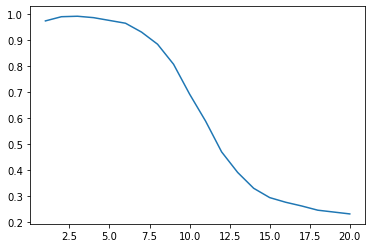

In [6]:
import matplotlib.pyplot as plt

K_list = np.arange(1, 21, 1)
accuracy = dict()
for K in K_list:
#     print(f'Testing Markov Model with {K} length prefixes')
    counts = 0
    iterations = 0
    
    spam = MarkovModel(K)
    spam.load_file("text/spamham/spam_train.txt")
    
    ham = MarkovModel(K)
    ham.load_file("text/spamham/ham_train.txt")
    
    for truth in ('spam', 'ham'):
        fin = open("text/spamham/{}_test.txt".format(truth), encoding='utf-8')
        text = fin.readlines() # This holds the text as a string
        fin.close()
        
        for s in text:
            spam_log_prob = spam.get_log_probability(s)
            ham_log_prob = ham.get_log_probability(s)

            predicted = 'spam'
            if ham_log_prob > spam_log_prob:
                predicted = 'ham'
            if predicted == truth: 
                if K==3:
                    print(f'Correct: {truth, s}')
                counts += 1
            else:
                if K==3:
                    print(f'Incorrect: {truth, s}')
            iterations += 1
            
    accuracy[K] = counts/iterations
    
print(f'K that maximizes accuracy: {max(accuracy, key=accuracy.get)}')
plt.plot(accuracy.keys(), accuracy.values())
plt.show()
        

The main difference between the debate plot and this plot is that this plot's peak is earlier than the one in the debate. In other words, smaller K's work better for classifying spam and ham. I think this is because spam usually contains special characters like "$,!,*,&" as a higher rate than in speech debates. Thus, whenever you see special characters and a couple surrounding characters, that is likely sufficient to classify an email as spam. Too big of K will overfit to the model and, in this case, may be too specific to random cases of special character usage. So keeping it small seems better here.

## Average word length in 2016 debate training data

In [178]:
fin = open('text/2016Debates/trump1.txt')
s = fin.read()
fin.close()
fin = open('text/2016Debates/trump2.txt')
s += fin.read()
fin.close()
fin = open('text/2016Debates/clinton1.txt')
s += fin.read()
fin.close()
fin = open('text/2016Debates/clinton2.txt')
s += fin.read()
fin.close()

spec_chars = ['\n', '!', '.', ',', '?', '-', '_','#','%']
for spec_char in spec_chars:
    s = s.replace(spec_char, '')
s_split = s.split()

length = 0
counter = 0
for s in s_split:
    length += len(s)
    counter += 1

print(length/counter)

4.296284020181932


## Experiment 3: Movie Reviews

Now testing 1
Now testing 2
Now testing 3
Now testing 4
Now testing 5
Now testing 6
Now testing 7
Now testing 8
Now testing 9
Now testing 10
Now testing 11
Now testing 12
Now testing 13
Now testing 14
Now testing 15
Now testing 16
Now testing 17
Now testing 18
Now testing 19
K that maximizes accuracy: 4
{1: 0.615, 2: 0.78, 3: 0.79, 4: 0.805, 5: 0.76, 6: 0.735, 7: 0.735, 8: 0.745, 9: 0.765, 10: 0.77, 11: 0.77, 12: 0.78, 13: 0.79, 14: 0.8, 15: 0.77, 16: 0.775, 17: 0.75, 18: 0.755, 19: 0.75}


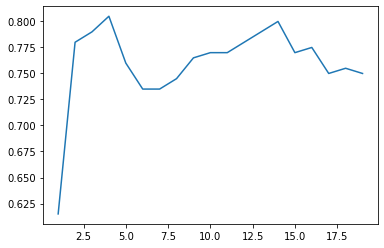

In [183]:
import matplotlib.pyplot as plt

K_list = np.arange(1, 20, 1)
accuracy = dict()
for K in K_list:
    print('Now testing {}'.format(K))
    pos_model = MarkovModel(K)
    neg_model = MarkovModel(K)
    
    correct = 0
    iterations = 0
    
    for i in range(900):
        pos_model.load_file_lines('text/movies/pos/{}.txt'.format(i))
        neg_model.load_file_lines('text/movies/neg/{}.txt'.format(i))
    
    for truth in ('pos', 'neg'):
        for j in range(100):
            fin = open("text/movies/{0}/{1}.txt".format(truth, j+900), encoding='utf-8')
            review = fin.read() # This holds the text as a string
            fin.close()
            
            pos_lprob = pos_model.get_log_probability(review)
            neg_lprob = neg_model.get_log_probability(review)
            
            pred = 'pos'
            if neg_lprob > pos_lprob:
                pred = 'neg'
            if pred == truth:
                correct += 1
            iterations += 1
    
    accuracy[K] = correct / iterations

opt_K = max(accuracy, key=accuracy.get)
print(f'K that maximizes accuracy: {opt_K}')
print(accuracy)
plt.plot(accuracy.keys(), accuracy.values())
plt.show()

        

The optimal K is actually quite hard to pin in this example. There are many different K's that give decent accuracies, but none do an outstanding job in terms of accuracies. This differs from the other experiments where there was a peak in K, but here there is a range of K's. I think this results from the data being harder to model using the Markov model. Bag of words is good for identifying next words, but not good for identifying meaning of joint words. For instance, a lot of reviews say things like, "it was not great" or " it could be perfect if...". By setting up the phrase mentioning words with positive sentiment in a negative light, the model will struggle.

## Reviews I found

In [5]:
pos_model = MarkovModel(4)
neg_model = MarkovModel(4)

correct = 0
iterations = 0

for i in range(900):
    pos_model.load_file_lines('text/movies/pos/{}.txt'.format(i))
    neg_model.load_file_lines('text/movies/neg/{}.txt'.format(i))

mapping = {'pos':['inception', 'avatar', 'monstersinc', 'parasite', 'fightclub'],
           'neg':['grownups', 'transformers', 'waiting', 'starwars9', 'platform']}

count = 0
iterations = 0
for k, v in mapping.items():
    for movie in v:
        fin = open("text/movies/custom/{0}/{1}.txt".format(k, movie))
        review = fin.read() # This holds the text as a string
        fin.close()

        pos_lprob = pos_model.get_log_probability(review)
        neg_lprob = neg_model.get_log_probability(review)
        
        isCorrect = False
        
        pred = 'pos'
        if neg_lprob > pos_lprob:
            pred = 'neg'
            
        if pred == k:
            count +=1
        iterations += 1

        print(f'{movie} -- truth: {k}, classified {pred}')
print(f'Accuracy: {count/iterations}')
    
    

inception -- truth: pos, classified pos
avatar -- truth: pos, classified pos
monstersinc -- truth: pos, classified pos
parasite -- truth: pos, classified pos
fightclub -- truth: pos, classified pos
grownups -- truth: neg, classified pos
transformers -- truth: neg, classified neg
waiting -- truth: neg, classified pos
starwars9 -- truth: neg, classified pos
platform -- truth: neg, classified neg
Accuracy: 0.7


The classifier did a decent job and got 7/10 of the movies correct! It seems that the only misclassified cases were for negative movie reviews. This makes sense because a lot of negative reviews use conditionals combined with positive sentiment words. For example, "this could have been good if...". That is a tricky situation for bag words to deal with.

## Poetic Statement

In [4]:
hybrid = MarkovModel(6)
hybrid.load_file_lines('text/beemovie.txt')
hybrid.load_file_lines('text/interstellar.txt')

hybrid.synthesize_text(150)

Accord {'i': 1}
ccordi {'n': 1}
cordin {'g': 1}
ording {' ': 1}
rding  {'t': 1}
ding t {'o': 4, 'h': 5, 'i': 2}
ing to {' ': 60, 'g': 1, 'd': 1, '.': 1, 'w': 2}
ng to  {'a': 3, 't': 10, 'b': 6, 'm': 5, 'h': 6, 's': 7, 'k': 1, 'l': 2, 'y': 3, 'A': 1, 'T': 1, 'B': 1, 'd': 4, 'p': 1, 'g': 3, 'c': 2, 'i': 1, 'f': 3, 'r': 1}
g to a {'l': 2, ' ': 1}
 to al {'l': 2, 'e': 1}
to all {' ': 3, 'o': 1}
o all  {'k': 1, 'b': 1, 't': 1}
 all k {'n': 3}
all kn {'o': 2, 'e': 1}
ll kno {'w': 2}
l know {'n': 1, ',': 1}
 known {' ': 1, '.': 1}
known  {'l': 1}
nown l {'a': 1}
own la {'w': 1}
wn law {'s': 1}
n laws {'A': 1}
 lawsA {'c': 1}
lawsAc {'c': 1}
awsAcc {'o': 1}
wsAcco {'r': 1}
sAccor {'d': 1}
of avi {'a': 1}
f avia {'t': 1}
 aviat {'i': 1}
aviati {'o': 1}
viatio {'n': 1}
iation {',': 1}
ation, {'o': 1, 'A': 1, 'S': 1, ' ': 1}
tion,o {'f': 1}
ion,of {' ': 1}
on,of  {'a': 1}
n,of a {'v': 1}
,of av {'i': 1}
there  {'i': 9, 't': 3, 'o': 2, 'a': 5, 'w': 4, 'm': 1, 'f': 1, 'r': 1}
here i {'s': 15, 't': 

lying  {'i': 2, 'w': 1, 'u': 1, 'o': 1, 't': 1, 'a': 1}
ying i {'n': 2, 't': 1}
ing in {' ': 8, '.': 3, 't': 4, 'n': 1, 'O': 1, 's': 1}
ng in  {'t': 5, 'a': 3, 'w': 1, 'f': 1}
g in t {'h': 5}
 in th {'e': 39, 'i': 8, 'r': 2, 'a': 2}
in the {' ': 34, 'r': 8, 'y': 1, 'C': 1, 'T': 1, 'i': 1}
n the  {'h': 8, 'K': 1, 'j': 1, 'm': 2, 'l': 3, 'c': 5, 'p': 1, 'T': 1, 'n': 1, 'r': 3, 'w': 6, 'f': 3, 'b': 7, 't': 5, 'o': 4, 'e': 1, 'a': 2, 'g': 2, 's': 3, 'd': 2, 'D': 1, 'u': 1, 'E': 1, 'i': 1, 'R': 1}
 the h {'o': 18, 'i': 8, 'u': 7, 'a': 6, 'e': 2}
the ho {'u': 2, 'n': 8, 't': 1, 'w': 1, 'm': 1, 'r': 5}
he hou {'s': 2}
e hous {'e': 2}
 house {'!': 1, ' ': 1}
house! {'s': 1}
ouse!s {'t': 1}
use!st {'o': 1}
se!sto {'p': 1}
e!stop {' ': 1}
!stop  {'f': 1}
Hey, A {'d': 1}
ey, Ad {'a': 1}
y, Ada {'m': 1}
, Adam {'.': 1, ',': 2}
 Adam. {'H': 1}
Adam.H {'e': 1}
dam.He {'y': 1}
am.Hey {',': 1}
m.Hey, {' ': 1}
.Hey,  {'A': 1, 'B': 2, 'g': 2, 'H': 1, 'b': 1, 'D': 3, 'M': 1, 'C': 1}
Hey, B {'a': 1, 'l': 

corpor {'a': 1}
orpora {'t': 1}
rporat {'i': 1}
porati {'n': 1}
oratin {'g': 1}
rating {'I': 1, '?': 1}
atingI {' ': 1}
tingI  {'l': 1}
ingI l {'o': 1}
ngI lo {'v': 1}
gI lov {'e': 1}
an amu {'s': 1}
n amus {'e': 1}
 amuse {'m': 1}
amusem {'e': 1}
museme {'n': 1}
usemen {'t': 1}
sement {' ': 1}
ement  {'p': 1}
ment p {'a': 1}
ent pa {'r': 1}
nt par {'k': 1}
t park {' ': 1}
 park  {'i': 1}
park i {'n': 1, 't': 1}
ark in {'t': 1}
rk int {'o': 1}
k into {' ': 1}
 into  {'o': 3, 'a': 5, 'h': 2, 't': 11, 'y': 1, 's': 1, 'i': 1, 'G': 1, 'M': 1}
into o {'u': 1, 'r': 2}
nto ou {'r': 1}
to our {' ': 4}
o our  {'d': 1, 'h': 1, 'i': 1, 's': 1, 'g': 1}
 our d {'a': 1}
our da {'y': 1, 'u': 3}
ur day {'.': 1}
r day. {'a': 1}
 day.a {'n': 1}
day.an {' ': 1}
ay.an  {'a': 1}
y.an a {'m': 1, 'p': 1}
.an am {'u': 1}
at's w {'h': 14}
t's wh {'y': 9, 'a': 11, 'e': 1}
's why {' ': 8, '.': 1}
s why  {'w': 2, 'y': 1, 't': 3, 'I': 3, 'P': 1}
 why w {'e': 3, 'o': 2}
why we {' ': 3}
hy we  {'d': 1, 'c': 2}
y we 

Wonder {' ': 1}
onder  {'w': 3}
nder w {'h': 2, 'e': 1}
der wh {'a': 1, 'e': 1}
er wha {'t': 2}
r what {' ': 2, ',': 1}
 what  {'i': 8, '0': 1, 'y': 7, 'I': 9, 'h': 5, 'w': 8, 'a': 5, 't': 11, 'f': 1, 'c': 2, 'V': 1, 'n': 1, 'M': 1, 's': 3, 'P': 1, 'm': 1, 'd': 2}
what i {'t': 5, 'f': 4, 'd': 1}
hat it {"'": 3, ' ': 3}
at it' {'l': 1, 's': 2}
t it'l {'l': 1}
 it'll {' ': 1}
it'll  {'b': 1, 'h': 1}
t'll b {'e': 1}
l be l {'i': 1, 'u': 1}
 be li {'k': 1}
be lik {'e': 1}
e like {'?': 1, ' ': 4}
 like? {'W': 2, 'I': 1}
like?W {'o': 1, 'h': 1}
ike?Wo {'n': 1}
ke?Won {'d': 1}
e?Wond {'e': 1}
?Wonde {'r': 1}
ttle s {'c': 1, 't': 4}
tle sc {'a': 1}
le sca {'r': 1}
e scar {'y': 2, 'i': 1}
 scary {'.': 1, ' ': 1, ',': 1}
scary. {'A': 1}
cary.A {' ': 1}
ary.A  {'l': 1}
ry.A l {'i': 1}
y.A li {'t': 1}
come t {'o': 3, 'a': 1}
ome to {' ': 3}
me to  {'H': 1, 'b': 2, 'f': 2, 'k': 1, 'h': 2, 't': 1, 'r': 1, 'l': 1, 'w': 1}
e to H {'o': 1}
 to Ho {'n': 1}
to Hon {'e': 1}
o Hone {'x': 1, 'y': 1}
Honex, 

 right {'.': 16, ' ': 30, ',': 25, '?': 11, 'i': 1, 'j': 1, 'K': 1, '!': 1}
right. {'R': 2, 'Y': 1, ' ': 6, 'A': 5, 'f': 1, 'M': 1, 'O': 1}
ight.R {'i': 6}
ght.Ri {'g': 6}
ht.Rig {'h': 6}
t.Righ {'t': 7}
.Right {'.': 9, ',': 1, ' ': 1}
At Hon {'e': 1}
onex,  {'w': 1}
nex, w {'e': 1}
ex, we {' ': 1}
x, we  {'c': 1}
, we c {'o': 1, 'a': 1}
 we co {'n': 1, 'u': 3}
we con {'s': 1}
e cons {'t': 1}
 const {'a': 3, 'r': 1}
consta {'n': 3}
onstan {'t': 3}
nstant {'l': 1, '.': 2}
stantl {'y': 1}
tantly {' ': 1}
antly  {'s': 1, 'c': 1}
ntly s {'t': 1}
tly st {'r': 1}
ly str {'i': 1}
y stri {'v': 1, 'k': 1}
 striv {'e': 1}
strive {'A': 1}
triveA {'t': 1}
riveAt {' ': 1}
iveAt  {'H': 1}
veAt H {'o': 1}
eAt Ho {'n': 1}
to imp {'r': 1, 'o': 1}
o impr {'o': 1}
 impro {'v': 2}
improv {'e': 1, 'i': 1}
mprove {' ': 1}
prove  {'e': 1, 'i': 1}
rove e {'v': 1}
ove ev {'e': 1}
ve eve {'r': 4}
e ever {'y': 7, ' ': 3, 'T': 1}
 every {' ': 13, 'b': 6, 't': 8, 'w': 2, 'o': 3}
every  {'a': 1, 's': 1, 'd': 4, 'y'

dn't k {'n': 5}
n't kn {'o': 33}
't kno {'w': 33}
t know {' ': 13, '.': 14, ',': 3, '"': 2, 'H': 1}
 that. {'I': 6, 'J': 1, 'L': 2, 'S': 1, ' ': 7, 'M': 1, 'o': 1, 'Y': 2, 'j': 1, 'T': 1, 'n': 1, 'N': 1, 'R': 3, 'p': 1, 'b': 1, 'W': 1, 'A': 1}
that.I {' ': 5, "'": 1}
hat.I  {'d': 1, 'c': 1, 'r': 1, 'h': 1, 't': 1}
at.I d {'i': 1}
t.I di {'d': 1}
.I did {'n': 3}
What's {' ': 19}
at's t {'h': 14, 'o': 1, 'a': 1}
t's th {'e': 16, 'a': 3, 'i': 1}
 the d {'i': 5, 'a': 7, 'e': 2, 'y': 3, 'u': 1}
the di {'f': 2, 'r': 1, 's': 1, 'm': 1}
he dif {'f': 2}
e diff {'e': 2}
ferenc {'e': 6}
erence {'?': 2, '.': 2, 's': 1, ' ': 1}
rence? {'W': 1, ' ': 1}
ence?W {'h': 2}
nce?Wh {'a': 1, 'e': 1}
ce?Wha {'t': 2}
e?What {"'": 1, ' ': 12}
?What' {'s': 16, 'd': 3}
You'll {' ': 3}
u'll b {'e': 3}
l be h {'a': 1, 'o': 1, 'e': 1}
 be ha {'p': 1}
be hap {'p': 1}
e happ {'y': 1, 'e': 1}
 happy {' ': 4, '.': 1}
happy  {'t': 3, 'o': 1}
appy t {'o': 2, 'h': 1}
ppy to {' ': 2}
py to  {'k': 1, 's': 1}
y to k {'n': 1}

ut you {' ': 10, 'r': 7, "'": 2, '.': 1}
t you  {'k': 4, 'o': 2, 'l': 1, 's': 6, 'w': 6, 'c': 2, 't': 1, 'd': 4, 'b': 1, 'j': 1, 'h': 4, 'g': 5, 'a': 5, 'f': 1}
 knowI {' ': 2}
knowI  {'d': 2}
nowI d {'o': 2}
owI do {'n': 2}
wI don {"'": 2}
what I {"'": 4, ' ': 7}
hat I' {'m': 3, 'd': 1, 'v': 1}
at I'm {' ': 3}
t I'm  {'t': 1, 'l': 1, 'm': 1, 'h': 1}
 I'm t {'a': 2, 'h': 2}
I'm ta {'l': 4}
'm tal {'k': 4}
m talk {'i': 4}
 talki {'n': 20}
talkin {'g': 20}
alking {' ': 17, '.': 1, '!': 2, 'Y': 1, 'I': 1, 'C': 1}
lking  {'a': 5, 't': 9, 'w': 1, 'b': 2}
king a {'b': 9, 't': 1, ' ': 2, 'f': 1, 'n': 1, 'r': 1}
ing ab {'o': 13, 'u': 1}
ng abo {'u': 13}
g abou {'t': 13}
about. {'w': 2, 't': 1, ' ': 2, 'I': 1}
bout.w {'h': 1, 'e': 1}
out.wh {'a': 1}
ut.wha {'t': 1}
t.what {' ': 4}
Please {' ': 3, ',': 1, '.': 1}
ease c {'l': 1}
ase cl {'e': 1}
se cle {'a': 1}
e clea {'r': 1, 'n': 1}
 clear {' ': 2, '.': 2}
clear  {'t': 1, 'y': 1}
lear t {'h': 1}
ear th {'e': 3}
ar the {' ': 2, 'y': 1}
the ga {'

ke too {' ': 1}
 too m {'u': 2}
too mu {'c': 2}
oo muc {'h': 2}
o much {' ': 5}
 much  {'o': 4, 'a': 2, 'l': 3, 'd': 1, 'p': 2, 'f': 2, 'h': 2, 'c': 1, 't': 1, 'y': 1}
much o {'f': 3, 'u': 1}
uch of {' ': 3}
ch of  {'i': 3}
h of i {'t': 3}
 of it {'.': 10, ',': 1, '!': 7}
of it. {'B': 2, 'T': 1, 'Y': 2, 'J': 1, 'b': 2, 'I': 1, 's': 1}
f it.B {'e': 1, 'u': 1}
 it.Be {'e': 2, 'c': 1}
it.Bee {'s': 2}
t.Bees {' ': 3}
.Bees  {'m': 2, 'h': 2, 'd': 1}
Perhap {'s': 1}
erhaps {'.': 1}
rhaps. {' ': 1}
haps.  {' ': 1}
aps.   {'U': 1}
ps.  U {'n': 1}
s.  Un {'l': 1}
.  Unl {'e': 1}
  Unle {'s': 1}
 Unles {'s': 1}
Unless {' ': 2}
nless  {'y': 4}
less y {'o': 4}
ess yo {'u': 5}
ss you {"'": 2, ' ': 3}
s you' {'r': 4}
 you'r {'e': 43}
you're {' ': 45, 'D': 1}
u're w {'e': 1, 'i': 1, 'r': 1}
're we {'a': 1}
re wea {'r': 1}
e wear {'i': 1}
 weari {'n': 4}
wearin {'g': 4}
earing {' ': 3, '?': 1, '.': 1}
aring  {'i': 2, 'a': 1, 't': 1}
ring i {'t': 8}
ing it {'P': 1, '.': 5, ' ': 12, '!': 1, "'": 1, '?':

 miles {' ': 1, ',': 1, 'o': 1}
miles  {'f': 1}
iles f {'r': 1}
les fr {'o': 1}
es fro {'m': 2}
s from {' ': 7}
 from  {'h': 4, 't': 15, 'H': 1, 'u': 2, 'y': 1, 'r': 1, 'N': 1, 'J': 1, 'o': 1, 'C': 1, 'M': 1, 'i': 1, 'e': 1, 'K': 1}
from h {'e': 4, 'i': 1}
rom he {'r': 4}
om her {'e': 4}
m here {' ': 5, 'Y': 1, '.': 4, ',': 2, '!': 1}
 here  {'t': 9, 'i': 6, 'l': 1, 'w': 2, 'e': 1, 'n': 3, 'f': 5, 'b': 3, 'h': 1, 'o': 2, 'a': 2}
re tom {'o': 1}
e tomo {'r': 2}
 tomor {'r': 2}
tomorr {'o': 2}
omorro {'w': 3}
morrow {'.': 1, ' ': 2}
orrow. {'s': 1}
rrow.s {'i': 1}
row.si {'x': 1}
ow.six {' ': 1}
w.six  {'m': 1}
.six m {'i': 1}
Six mi {'l': 1}
miles, {' ': 1}
iles,  {'h': 1}
les, h {'u': 1}
es, hu {'h': 2}
s, huh {'?': 3}
, huh? {'S': 1, 'G': 1, 'T': 2, 'N': 1, 'E': 1, 'g': 1, 'a': 1}
 huh?S {'i': 1}
huh?Si {'x': 1}
uh?Six {' ': 1}
h?Six  {'m': 1}
?Six m {'i': 1}
arry!B {'a': 3}
rry!Ba {'r': 3}
ry!Bar {'r': 3}
A pudd {'l': 1}
 puddl {'e': 1}
puddle {' ': 1}
uddle  {'j': 1}
ddle j {'u': 1}

 field {'m': 1, 's': 2, '.': 1}
fieldm {'a': 1}
ieldma {'y': 1}
eldmay {'b': 1}
ldmayb {'e': 1}
dmaybe {' ': 1}
just i {'s': 1}
ust is {'n': 1}
st isn {"'": 1}
t isn' {'t': 5}
 isn't {' ': 16, '.': 2}
isn't  {'r': 2, 'i': 2, 't': 2, 's': 5, 'a': 2, 'h': 2, 'g': 1, 'n': 1}
sn't r {'i': 1, 'e': 2}
n't ri {'g': 1}
't rig {'h': 1}
t righ {'t': 5}
right  {'f': 2, 'n': 8, 'y': 1, 't': 11, 'o': 2, 'd': 1, 'i': 1, 'a': 2, 'k': 1, 'w': 3, 's': 1, 'u': 1, 'h': 2}
ight f {'o': 1, 'l': 1}
ght fo {'r': 1}
ht for {' ': 1}
t for  {'m': 3, 't': 5, 'y': 4, 'a': 2, 'o': 1, 'c': 1, 'u': 1}
 for m {'e': 9, 'y': 3, 'a': 1, 'i': 1, 'o': 2}
for me {'.': 5, ',': 1, '?': 1, 'W': 1, ' ': 1}
or me. {'j': 1, 'Y': 1, 'O': 1, 't': 2}
r me.j {'u': 1}
 me.ju {'s': 1}
me.jus {'t': 1}
e.just {' ': 2}
You we {'r': 7}
ou wer {'e': 18}
u were {' ': 15, 'A': 1, ',': 1, '.': 1}
were t {'h': 5, 'o': 1, 'r': 2}
re thi {'n': 3, 's': 1}
thinki {'n': 11}
hinkin {'g': 30}
inking {' ': 28, 'W': 1, '?': 1}
nking  {'o': 1, 'b': 22, 

arting {' ': 3}
rting  {'w': 1, 'y': 1, 'p': 1, 'a': 2, 's': 1, 't': 1}
ting w {'o': 1, 'i': 1}
ing wo {'r': 3}
ng wor {'k': 2, 's': 1}
g work {' ': 1, 'e': 1}
work t {'o': 2}
ork to {'d': 1, 'g': 1}
rk tod {'a': 1}
k toda {'y': 1}
today! {'W': 1}
oday!W {'e': 1}
day!We {"'": 1}
ay!We' {'r': 1}
y!We'r {'e': 1}
!We're {' ': 4}
Today' {'s': 1}
oday's {' ': 2}
ay's t {'h': 1}
y's th {'e': 2}
the da {'y': 3, 'r': 1, 't': 3}
he day {'.': 2, 's': 1, ' ': 1}
e day. {'T': 1, 'd': 1, 'B': 1}
 day.T {'o': 1}
day.To {'d': 1}
ay.Tod {'a': 1}
y.Toda {'y': 1}
.Today {"'": 1}
Oome o {'n': 6}
ome on {'!': 11, ',': 10, '.': 6}
me on! {' ': 3, 'O': 2, 'C': 4, 'M': 2}
e on!  {' ': 3}
 on!   {'A': 1, 'I': 1, 'C': 1, 'G': 1}
on!  A {'l': 1}
n!  Al {'l': 1}
!  All {' ': 1}
  All  {'t': 2, 'r': 1, 'I': 1}
 All t {'h': 2}
All th {'e': 4, 'i': 1}
ll the {' ': 14, 's': 5, 'r': 1}
l the  {'g': 1, 'c': 1, 't': 5, 'b': 2, 'h': 2, 'f': 1, 'i': 1, 'a': 1, 'd': 1}
the go {'o': 1, 'v': 1}
he goo {'d': 1}
e good {' ': 

ned up {' ': 1, '.': 1}
ed up  {'a': 1, 'i': 1}
d up a {'g': 1}
 up ag {'a': 1}
up aga {'i': 1}
p agai {'n': 1}
 again {'.': 7, '?': 2, 's': 5, ' ': 2}
again. {'T': 1, ' ': 2, 'D': 1, 'e': 1, 'W': 1, 'S': 1}
gain.T {'h': 1}
ain.Th {'e': 2, 'i': 1}
in.The {' ': 1, 'n': 1}
n.The  {'K': 1, 'w': 1}
.The K {'r': 1}
What h {'a': 11, 'o': 1}
at hap {'p': 11}
t happ {'e': 11, 'y': 2}
appene {'d': 11}
ppened {'?': 2, ' ': 8, 'L': 1}
pened? {'W': 1, ' ': 1}
ened?W {'h': 1}
ned?Wh {'a': 1}
ed?Wha {'t': 1}
d?What {' ': 2, '?': 1, "'": 1}
A bee  {'d': 1}
 bee d {'i': 1, 'o': 2}
bee di {'e': 1}
ee die {'d': 1}
e died {'.': 3, ' ': 1}
 died. {' ': 1, 'y': 1, 'T': 1, 'W': 1}
died.  {' ': 1}
ied.   {'M': 1, 'T': 1}
ed.  M {'a': 1}
d.  Ma {'k': 1}
.  Mak {'e': 1}
  Make {'s': 1}
 Makes {' ': 1}
Makes  {'a': 1}
akes a {'n': 1, ' ': 3}
kes an {' ': 1}
es an  {'o': 1}
s an o {'p': 1, 'l': 2, 'y': 1}
 an op {'e': 1}
 openi {'n': 2}
openin {'g': 2}
ening. {' ': 3}
ning.  {' ': 4}
ing.   {'S': 1, 'W': 3, 'L':

e,If a {'n': 1}
,If an {'y': 1}
's a K {'o': 1}
s a Ko {'r': 1}
 a Kor {'e': 1}
a Kore {'a': 1}
 Korea {'n': 1}
Korean {' ': 1}
orean  {'d': 1}
rean d {'e': 1}
ean de {'l': 1}
an del {'i': 1}
n deli {' ': 1}
 deli  {'o': 1}
deli o {'n': 1}
eli on {' ': 1}
li on  {'8': 1}
i on 8 {'3': 1}
 on 83 {'r': 1}
on 83r {'d': 1}
n 83rd {'t': 1}
 83rdt {'h': 1}
83rdth {'e': 1}
3rdthe {'r': 1}
rdther {'e': 1}
dthere {"'": 1}
that g {'e': 1, 'o': 4}
hat ge {'t': 1}
at get {'s': 1}
t gets {' ': 1}
 gets  {'t': 3, 'l': 1, 'o': 1}
gets t {'h': 2, 'o': 1}
ets th {'e': 2}
ts the {'i': 1, 'r': 1, ' ': 1}
s thei {'r': 4}
 their {' ': 16, 'T': 1}
their  {'r': 1, 'm': 1, 't': 1, 'n': 1, 'w': 3, 'l': 2, 'c': 5, 'e': 1, 'f': 2, 'o': 1}
heir r {'o': 1}
eir ro {'s': 1}
ir ros {'e': 1}
r rose {'s': 1}
 roses {' ': 3, 'A': 1, ',': 1}
roses  {'t': 1, 'v': 1, 'h': 1}
oses t {'o': 1}
ses to {'d': 1}
es tod {'a': 1}
s toda {'y': 1}
today. {'t': 2, ' ': 1}
oday.t {'h': 2}
day.th {'a': 2}
ay.tha {'t': 2}
y.that {' ': 2}

 rooki {'e': 2}
rookie {'s': 1, '!': 1}
ookies {',': 1}
okies, {'A': 1}
kies,A {'n': 1}
ies,An {'d': 1}
es,And {' ': 2}
s,And  {'a': 1, 'j': 1}
,And a {' ': 1}
bee la {'w': 4}
ee law {' ': 1, '.': 3}
e law  {'n': 1}
 law n {'u': 1}
law nu {'m': 1}
aw num {'b': 1}
w numb {'e': 1}
mber o {'n': 2}
ber on {'e': 2}
er one {',': 2, '?': 1, '!': 1, '.': 2, ' ': 1}
r one, {'b': 1, ' ': 1}
 one,b {'e': 1}
one,be {'e': 1}
ne,bee {' ': 1}
e,bee  {'l': 1}
,bee l {'a': 1}
absolu {'t': 3}
bsolut {'e': 4}
solute {'l': 3, ' ': 1}
olutel {'y': 3}
lutely {' ': 3}
utely  {'n': 2, 'p': 1}
tely n {'o': 2}
ely no {' ': 2}
ly no  {'t': 1, 'f': 1, 'r': 1}
y no t {'a': 1}
 no ta {'l': 1}
no tal {'k': 1}
o talk {'i': 1, ' ': 6, '!': 1, '.': 1}
king t {'o': 9, 'h': 4}
g to h {'u': 3, 'a': 2, 'e': 1}
 to hu {'m': 3}
to hum {'a': 4}
o huma {'n': 4}
umans! {'a': 1, ' ': 1, 'y': 1, 'G': 1}
mans!a {'b': 1}
ans!ab {'s': 1}
ns!abs {'o': 1}
s!abso {'l': 1}
!absol {'u': 1}
ght, l {'a': 1, 'e': 3, 'o': 1}
ht, la {'u': 1}


 is on {'e': 4, '.': 1, ' ': 2}
is one {' ': 4, ',': 1}
s one  {'n': 2, 'o': 1, 'w': 1, 'l': 1}
 one n {'e': 2}
one ne {'c': 1, 'e': 1}
ne nec {'t': 1}
ctar c {'o': 1}
tar co {'l': 1}
ar col {'l': 1, 'd': 1}
r coll {'e': 2}
collec {'t': 2}
ollect {'o': 1, 'i': 1}
llecto {'r': 1}
lector {'!': 1}
ector! {'T': 1}
ctor!T {'h': 1}
tor!Th {'a': 1}
or!Tha {'t': 1}
r!That {' ': 1}
!That  {'i': 1, 'w': 1, 'b': 1}
Ever s {'e': 1}
r see  {'p': 1}
 see p {'o': 1}
see po {'l': 1}
ee pol {'l': 1}
 polli {'n': 4}
pollin {'a': 6}
ollina {'t': 6}
llinat {'i': 5, 'e': 1}
linati {'o': 5}
inatio {'n': 6}
nation {' ': 2, '.': 1, 'a': 1, ',': 1, '!': 2, 'B': 1}
ation  {'u': 1, 'a': 1, 'b': 1, 'w': 2, 'i': 4, 'f': 3, 'c': 1, 't': 1}
tion u {'p': 1}
ion up {' ': 1}
on up  {'c': 1}
n up c {'l': 1}
 up cl {'o': 1}
up clo {'s': 1}
p clos {'e': 1}
close? {'E': 1, 'D': 1}
lose?E {'v': 1}
ose?Ev {'e': 1}
se?Eve {'r': 1}
e?Ever {' ': 1}
?Ever  {'s': 1}
No, si {'r': 1}
o, sir {'.': 1}
, sir. {'N': 1, 'Y': 1, ' ': 1, 

guys.  {' ': 1}
uys.   {'I': 1}
ys.  I {'t': 1}
s.  It {"'": 3, ' ': 2}
.  It' {'s': 15}
tle gr {'a': 2}
le gra {'b': 2}
e grab {'b': 2}
 grabb {'y': 2}
grabby {'.': 2}
rabby. {'O': 1, 'T': 1}
abby.O {'a': 1}
bby.Oa {'r': 1}
by.Oar {'e': 1}
y.Oare {'f': 1}
.Oaref {'u': 1}
My swe {'e': 1, 'a': 1}
y swee {'t': 1}
weet l {'o': 1}
eet lo {'r': 1}
et lor {'d': 1}
t lord {' ': 1}
 lord  {'o': 1}
lord o {'f': 1}
ord of {' ': 1}
rd of  {'b': 1, 'h': 1}
d of b {'e': 1}
 of be {'e': 3}
f bees {'!': 2, 'M': 1}
 bees! {'M': 1, 'D': 1, 't': 1, 'T': 2, 'N': 1, 'B': 1, 'H': 1, 'f': 1, ' ': 2, 'F': 3, 'm': 1, 'W': 1}
bees!M {'y': 1}
ees!My {' ': 1}
es!My  {'s': 1}
s!My s {'w': 1}
!My sw {'e': 1}
Oandy- {'b': 1}
andy-b {'r': 1}
ndy-br {'a': 1}
dy-bra {'i': 1}
y-brai {'n': 1}
-brain {',': 1}
brain, {' ': 1}
rain,  {'g': 1}
ain, g {'e': 1}
in, ge {'t': 1}
n, get {' ': 1}
, get  {'o': 1, 'a': 1, 'r': 3, 'b': 1, 'h': 1}
get of {'f': 1}
et off {' ': 1}
t off  {'t': 3}
f ther {'e': 3}
there! {'O': 1, ' ': 1}

't fly {' ': 5}
rain.O {'a': 3}
ain.Oa {'n': 3}
in.Oan {"'": 3}
n.Oan' {'t': 3}
.Oan't {' ': 4}
Mayday {'!': 2}
ayday! {' ': 2}
yday!  {' ': 2}
ay!  M {'a': 1}
y!  Ma {'y': 1}
!  May {'d': 1}
  Mayd {'a': 1}
 Mayda {'y': 1}
ay!  B {'e': 1}
y!  Be {'e': 1}
!  Bee {' ': 1, '!': 1, 'p': 1}
  Bee  {'g': 1}
 Bee g {'o': 1}
Bee go {'i': 1}
ee goi {'n': 1}
ing do {'w': 5}
ng dow {'n': 5}
g down {'!': 1, '.': 3, ' ': 1}
 down! {'M': 2, 'S': 2, 'I': 1}
down!M {'a': 1, 'r': 1}
own!Ma {'y': 1}
wn!May {'d': 1}
n!Mayd {'a': 1}
!Mayda {'y': 1}
Ken, c {'o': 2}
en, co {'u': 2}
n, cou {'l': 2}
, coul {'d': 2}
 you c {'l': 2, 'a': 16, 'r': 1, 'o': 4, 'h': 2}
you cl {'o': 2}
ou clo {'s': 2}
u clos {'e': 2}
closeK {'e': 2}
loseKe {'n': 2}
oseKen {',': 2}
seKen, {' ': 2}
eKen,  {'c': 2}
the wi {'n': 5}
he win {'d': 3, 'g': 2}
e wind {'o': 3}
 windo {'w': 5}
window {' ': 2, '!': 1, '?': 1, 's': 1}
indow  {'p': 2}
ndow p {'l': 2}
dow pl {'e': 2}
ow ple {'a': 2}
w plea {'s': 2}
 pleas {'e': 18, 'a': 1}
lease?

n it.h {'a': 1}
 it.ha {'v': 1}
it.hav {'i': 1}
t.havi {'n': 1}
.havin {'g': 1}
I pred {'i': 1}
 predi {'c': 1}
predic {'t': 2}
redict {'e': 1, 'a': 1}
edicte {'d': 1}
dicted {' ': 1, 'T': 1}
icted  {'g': 1}
cted g {'l': 1}
ted gl {'o': 1}
ed glo {'b': 1}
d glob {'a': 1}
 globa {'l': 1}
global {' ': 1}
lobal  {'w': 1}
obal w {'a': 1}
bal wa {'r': 1}
al war {'m': 1}
l warm {'i': 1}
 warmi {'n': 1}
warmin {'g': 1}
arming {'.': 3, ',': 1}
rming. {'I': 1, 'j': 1, 'Y': 1}
ming.I {' ': 3}
ing.I  {'p': 1, 'g': 2, 'k': 2, 'd': 1, 'w': 1, 't': 2, 'r': 1}
ng.I p {'r': 1}
g.I pr {'e': 1}
.I pre {'d': 1}
ould f {'e': 1, 'a': 1}
uld fe {'e': 1}
ld fee {'l': 1}
d feel {' ': 1}
feel i {'t': 1}
eel it {' ': 1}
el it  {'g': 1}
l it g {'e': 1}
 it ge {'t': 1}
it get {'t': 1}
t gett {'i': 3}
ting h {'o': 3}
ing ho {'t': 1, 'm': 5, 'n': 4, 'w': 1}
ng hot {'t': 1}
g hott {'e': 1}
 hotte {'r': 1, 's': 1}
hotter {'.': 1}
otter. {'I': 1}
tter.I {' ': 1}
ter.I  {'c': 1, 'w': 1}
er.I c {'o': 1, 'a': 1}
r.I co {

rt nig {'h': 4}
t nigh {'t': 4}
 night {'?': 2, '.': 3, ' ': 2, '!': 1, 'm': 1, 'D': 4, 's': 1, 'f': 1}
night? {'V': 1, ' ': 1}
ight?V {'a': 1}
ght?Va {'n': 1}
ht?Van {'e': 1}
t?Vane {'s': 1}
?Vanes {'s': 3}
ure, K {'e': 1}
re, Ke {'n': 1}
e, Ken {'.': 2}
, Ken. {' ': 2, 'G': 1}
 Ken.  {' ': 2}
Ken.   {'Y': 1, 'S': 1}
en.  Y {'o': 1}
n.  Yo {'u': 3}
 You k {'n': 2}
now, w {'h': 1}
ow, wh {'a': 1}
w, wha {'t': 1}
 whate {'v': 3}
whatev {'e': 6}
hateve {'r': 7}
atever {'.': 2, ' ': 5}
tever. {'S': 1, 'Y': 1}
ever.S {'u': 1}
ver.Su {'r': 1}
er.Sur {'e': 1}
r.Sure {',': 1}
You co {'u': 3, 'm': 1}
ou cou {'l': 6}
u coul {'d': 6}
ld put {' ': 1}
d put  {'c': 1, 'b': 2}
 put c {'a': 1}
put ca {'r': 1}
ut car {'o': 1}
t caro {'b': 1}
 carob {' ': 1}
carob  {'c': 1}
arob c {'h': 1}
rob ch {'i': 1}
ob chi {'p': 1}
b chip {'s': 1}
 chips {' ': 1}
chips  {'o': 1}
hips o {'n': 1}
ips on {' ': 1}
ps on  {'t': 1}
n ther {'e': 10}
here.Y {'o': 3}
ere.Yo {'u': 3}
re.You {' ': 3}
e.You  {'c': 2, 'a': 1,

ou.I h {'a': 1}
u.I ha {'d': 1}
.I had {' ': 4}
just h {'o': 7, 'e': 2, 'a': 3}
ust ho {'w': 4, 'p': 2, 'n': 1}
st how {' ': 4}
t how  {'I': 1, 'g': 1, 'i': 1, 'm': 1}
 how I {' ': 1}
how I  {'w': 1}
ow I w {'a': 1}
w I wa {'s': 1}
 I was {' ': 12, '.': 1}
I was  {'r': 1, 'w': 2, 'j': 1, 't': 2, 'e': 1, 'a': 3, 'd': 3, 'b': 1, 'p': 2, 's': 2, 'n': 1, 'y': 1}
 was r {'a': 1, 'e': 1}
was ra {'i': 1}
as rai {'s': 1}
s rais {'e': 1}
 raise {'d': 2, ' ': 3}
raised {'.': 1, ' ': 1}
aised. {'I': 1}
ised.I {'t': 1}
sed.It {"'": 1}
ed.It' {'s': 1}
d.It's {' ': 3}
 was a {' ': 10, 'm': 1, 'w': 1, 'l': 8, 'b': 1, 't': 2}
was a  {'l': 1, 's': 1, 'g': 1, 'D': 1, 'b': 2, 'f': 2, 'k': 1, 'p': 1}
as a l {'i': 1}
ttle w {'e': 1, 'i': 1}
tle we {'i': 1}
le wei {'r': 1}
e weir {'d': 1}
 weird {'.': 1}
weird. {'T': 1}
eird.T {'h': 1}
ird.Th {'a': 1, 'i': 1}
rd.Tha {'t': 1}
d.That {' ': 2, "'": 1}
king w {'i': 1}
ing wi {'t': 6}
ng wit {'h': 8}
g with {' ': 6, 'a': 1, 'o': 1}
th a b {'e': 1, 'a': 1}
h a be

ison.a {'s': 1}
son.as {' ': 1}
on.as  {'t': 1, 'a': 1}
n.as t {'h': 1}
.as th {'e': 1}
He fin {'a': 1}
e fina {'l': 2}
 final {'l': 2, ' ': 2}
finall {'y': 2}
inally {' ': 2}
nally  {'g': 1, 'b': 1}
y gets {' ': 1}
s ther {'e': 5}
here.H {'e': 1, 'o': 1}
ere.He {' ': 1}
re.He  {'f': 1}
e.He f {'i': 1}
.He fi {'n': 1}
He run {'s': 1}
e runs {' ': 1}
 runs  {'u': 1}
runs u {'p': 1}
uns up {' ': 1}
ns up  {'t': 1}
s up t {'h': 1, 'o': 1}
 up th {'e': 6}
up the {' ': 2, 'r': 4}
p the  {'s': 2, 'r': 1, 'n': 1, 'm': 1}
he ste {'p': 1}
e step {'s': 1, ' ': 1}
 steps {' ': 1}
steps  {'i': 1}
teps i {'n': 1}
eps in {'t': 1}
ps int {'o': 1}
s into {' ': 2}
the ch {'u': 2, 'l': 1}
he chu {'r': 1, 't': 1}
e chur {'c': 1}
 churc {'h': 1}
church {'.': 1}
hurch. {'H': 1}
urch.H {'e': 1}
rch.He {' ': 1}
ch.He  {'r': 1}
h.He r {'u': 1}
.He ru {'n': 1}
The we {'d': 1}
he wed {'d': 1}
e wedd {'i': 1}
 weddi {'n': 1}
weddin {'g': 1}
edding {' ': 1}
dding  {'i': 1, 'm': 1}
ding i {'s': 1, 'n': 2}
ing is {

nce.I  {'l': 1, 'k': 1}
ce.I l {'o': 1}
e.I lo {'s': 2}
.I los {'t': 2}
y do g {'i': 1, 'e': 1}
 do gi {'r': 1}
do gir {'l': 1}
o girl {'s': 2, ' ': 1}
 girls {' ': 2, '.': 1}
girls  {'p': 1, 't': 1}
irls p {'u': 1}
rls pu {'t': 1}
ls put {' ': 1}
s put  {'r': 1}
 put r {'i': 1}
put ri {'n': 1}
ut rin {'g': 1}
t ring {'s': 1}
 rings {' ': 1, '!': 1}
rings  {'o': 1}
ings o {'n': 2, 'f': 2}
ngs on {' ': 1, 'S': 1}
gs on  {'t': 1}
n thei {'r': 2}
heir t {'o': 1}
eir to {'e': 1}
ir toe {'s': 1}
r toes {'?': 1}
 toes? {'W': 1}
toes?W {'h': 1}
oes?Wh {'y': 1, 'a': 1}
es?Why {' ': 1}
s?Why  {'d': 1, 'k': 1}
?Why d {'o': 4, 'i': 2}
Why no {'t': 3}
hy not {'?': 2, ' ': 1}
y not? {'W': 1, ' ': 1}
 not?W {'h': 2}
not?Wh {'y': 1, 'a': 1}
ot?Why {' ': 2}
t?Why  {'n': 2, 's': 1}
?Why n {'o': 3}
It's l {'i': 2}
like p {'u': 1, 'a': 1}
ike pu {'t': 1}
ke put {'t': 1}
e putt {'i': 1}
 putti {'n': 1}
puttin {'g': 1}
utting {' ': 4}
ng a h {'a': 1, 'u': 1}
g a ha {'t': 1}
 a hat {' ': 1}
a hat  {'o': 1}


ant th {'i': 1}
nt thi {'n': 1}
hings. {'T': 1, 'h': 1}
ings.T {'h': 2}
ngs.Th {'e': 2}
gs.The {'y': 1, ' ': 1}
.They  {'e': 1, 'd': 4, 'c': 7, 'h': 1, 's': 1}
They d {'r': 1, 'o': 4, 'i': 1}
hey dr {'i': 1}
ey dri {'v': 1}
y driv {'e': 1}
 drive {' ': 3, 's': 1}
drive  {'c': 1, 'o': 1, 'a': 1}
rive c {'r': 1}
ive cr {'a': 1}
ve cra {'z': 1}
razy.T {'h': 1}
azy.Th {'e': 1}
zy.The {'y': 1}
y.They {' ': 1}
Do the {'y': 1, ' ': 1, 's': 1}
o they {' ': 3}
they t {'r': 1}
hey tr {'y': 1}
ey try {' ': 1}
y try  {'a': 1}
 try a {'n': 1, 'g': 1}
try an {'d': 1}
ry and {' ': 2}
 and k {'i': 1}
and ki {'l': 1}
nd kil {'l': 1}
kill y {'o': 4}
l you, {' ': 4}
you, l {'i': 1, 'e': 1}
ou, li {'k': 1}
u, lik {'e': 1}
, like {' ': 6, 'a': 1, '.': 1}
like o {'n': 1, 'u': 1}
ike on {' ': 1}
ke on  {'T': 1}
e on T {'V': 1}
 on TV {'?': 1}
on TV? {'D': 1}
n TV?D {'o': 1}
 TV?Do {' ': 1}
TV?Do  {'t': 1}
V?Do t {'h': 1}
?Do th {'e': 2}
Some o {'f': 1}
ome of {' ': 4}
me of  {'t': 4}
them.  {' ': 2, '.': 1}


ck of  {'d': 1}
k of d {'y': 1}
 of dy {'n': 1}
of dyn {'a': 1}
f dyna {'m': 1}
 dynam {'i': 1}
dynami {'t': 1, 'c': 1}
ynamit {'e': 1}
namite {'!': 1}
amite! {'O': 1}
mite!O {'n': 1}
ite!On {'e': 1}
te!One {'-': 1}
e!One- {'e': 1}
!One-e {'i': 1}
life!S {'h': 1}
ife!Sh {'e': 1}
fe!She {' ': 1}
e!She  {'s': 1}
!She s {'a': 1}
d she  {'u': 1}
 she u {'n': 1}
she un {'d': 1}
he und {'e': 2}
e unde {'r': 4}
 under {'s': 11, ' ': 2, 'l': 1, 'g': 1}
unders {'t': 12}
nderst {'a': 11, 'o': 1}
dersta {'n': 11}
erstan {'d': 11}
rstand {'s': 1, '.': 3, ',': 1, 'I': 1, 'A': 1, ' ': 4}
stands {' ': 1}
tands  {'m': 1}
ands m {'e': 1}
nds me {'.': 1}
ds me. {'A': 1}
s me.A {'n': 1}
 me.An {'d': 1}
me.And {' ': 1}
e.And  {'s': 1, 'T': 1, 'w': 1, 'o': 1, 'g': 1}
.And s {'h': 1}
s is o {'v': 1, 'u': 3, 'n': 3}
 is ov {'e': 1}
is ove {'r': 1}
s over {'!': 1, ' ': 2}
 over! {'T': 1, ' ': 1}
over!T {'h': 1}
ver!Th {'i': 1}
er!Thi {'s': 1}
r!This {' ': 1}
Eat th {'i': 1}
at thi {'s': 9, 'n': 1}
t this {'.'

ger wi {'l': 2}
er wil {'l': 2}
r will {' ': 2}
will t {'h': 3, 'a': 1}
ill th {'i': 3, 'e': 2}
ll thi {'s': 5, 'n': 2}
l this {' ': 4, '.': 1}
this g {'o': 2, 'e': 2, 'u': 1}
his go {' ': 1, 'n': 1}
is go  {'o': 1}
s go o {'n': 1, 'v': 1}
 go on {'?': 2}
go on? {'H': 1, 't': 1}
o on?H {'o': 1}
 on?Ho {'w': 1}
on?How {' ': 1}
n?How  {'m': 1, 'a': 1}
?How m {'u': 1, 'a': 1}
t's be {'e': 3, 'c': 1}
's bee {'n': 8}
been t {'h': 2, 'a': 1, 'e': 1, 'r': 3}
en thr {'e': 1}
n thre {'e': 4}
 three {' ': 12, '.': 4, '-': 3}
 days! {'I': 1}
days!I {'t': 1}
ays!It {"'": 1}
ys!It' {'s': 1}
s!It's {' ': 1}
!It's  {'b': 1, 'o': 1, 'a': 1, 't': 1, 'n': 1, 'j': 1}
Why ar {'e': 4}
hy are {'n': 1, ' ': 4}
y aren {"'": 1}
 aren' {'t': 6}
aren't {' ': 7}
en't y {'o': 4}
n't yo {'u': 17}
't you {' ': 10, 'I': 1, 'r': 2, ',': 1, '?': 3}
you wo {'r': 1, 'u': 2, 'n': 1}
ou wor {'k': 1}
u work {'i': 1}
 worki {'n': 7}
workin {'g': 8}
orking {'?': 1, '.': 2, ' ': 4, ',': 1}
rking? {'W': 1}
king?W {'h': 1}
?Why 

ywhere {'?': 2, ' ': 1, '.': 1}
here?H {'o': 5}
ere?Ho {'w': 5}
re?How {' ': 4, "'": 1}
e?How  {'c': 1, 'd': 2, 'h': 1, 'a': 1, 'l': 2}
It's e {'x': 1}
t's ex {'h': 1, 'a': 1}
's exh {'a': 1}
s exha {'u': 1}
 exhau {'s': 2}
exhaus {'t': 2}
xhaust {'i': 1, 'e': 1}
hausti {'n': 1}
austin {'g': 1}
usting {'.': 1, ',': 1}
ting.  {' ': 1, '.': 1}
hy don {"'": 4}
y don' {'t': 9}
on't y {'o': 8, "'": 1}
t youI {'t': 1}
 youIt {"'": 2}
youIt' {'s': 2}
ouIt's {' ': 2}
uIt's  {'e': 1, 'p': 1}
run ev {'e': 1}
un eve {'r': 1}
n ever {'y': 1}
here?  {' ': 5}
ere?   {'I': 2, 'O': 1, 'Y': 1, 'A': 1}
re?  I {'t': 1, ' ': 1}
e?  It {"'": 1}
's fas {'t': 1}
s fast {'e': 1, ' ': 1}
 faste {'r': 4}
faster {'.': 1, ',': 2, '!': 1}
aster. {'r': 1, 'L': 1}
ster.r {'u': 1}
ter.ru {'n': 1}
er.run {' ': 1}
r.run  {'e': 1}
.run e {'v': 1}
eah, O {'K': 1}
ah, OK {',': 1}
h, OK, {' ': 1}
, OK,  {'I': 1}
 OK, I {' ': 1}
OK, I  {'s': 1, 'm': 1}
K, I s {'e': 1}
, I se {'e': 3}
 I see {',': 1, '.': 1, 'I': 1, ' ': 1}


 prett {'y': 9}
pretty {' ': 9}
retty  {'m': 2, 'b': 2, 'i': 1, 'c': 1, 'u': 1, 'g': 1, 'e': 1}
etty m {'u': 2}
tty mu {'c': 2}
ty muc {'h': 2}
y much {' ': 2, ',': 1}
uch ou {'r': 1}
ch our {' ': 4}
h our  {'l': 2, 'k': 1, 's': 1, 'w': 1}
ur lim {'i': 1}
r limi {'t': 1}
 limit {'.': 1, 'e': 1}
limit. {'S': 1}
imit.S {'e': 1}
mit.Se {'v': 1}
it.Sev {'e': 1}
t.Seve {'n': 1}
.Seven {'t': 1, ' ': 2}
You've {' ': 4}
ou've  {'r': 1, 't': 1, 'n': 1, 'd': 1, 'e': 1, 'f': 1, 's': 2, 'b': 1}
u've r {'e': 1}
've re {'a': 1}
ve rea {'l': 1}
e real {'l': 4, 'i': 3, ' ': 1}
lly go {'t': 1, 'o': 1}
ly got {' ': 1}
y got  {'t': 1, 'i': 1}
ot tha {'t': 4, 'n': 1}
 thatY {'o': 1}
thatYo {'u': 1}
hatYou {"'": 1}
atYou' {'v': 1}
tYou'v {'e': 1}
down t {'o': 2, 'h': 2}
own to {' ': 2}
wn to  {'a': 1, '7': 1}
n to a {' ': 1, 'c': 1}
to a s {'c': 1}
o a sc {'i': 1}
 a sci {'e': 2}
a scie {'n': 2}
 scien {'c': 3, 't': 3}
scienc {'e': 3}
cience {'.': 1, ' ': 1, '?': 1}
ence.d {'o': 1}
nce.do {'w': 1}
ce.dow {

is nic {'e': 1}
s nice {' ': 1}
 nice  {'h': 1, 't': 1}
nice h {'o': 1}
ice ho {'n': 1}
ce hon {'e': 1}
oney o {'u': 1}
ney ou {'t': 1}
ey out {',': 1, ' ': 1}
y out, {'a': 1}
 out,a {'n': 1}
out,an {'d': 1}
ut,and {' ': 1}
t,and  {'j': 1, 'a': 1}
,and j {'u': 1}
with n {'o': 2}
ith no {' ': 2}
th no  {'o': 1, 'w': 1}
h no o {'n': 1}
 no on {'e': 1}
no one {' ': 1}
o one  {'a': 1, 'k': 1}
 one a {'r': 2, 'f': 1}
one ar {'o': 1, 'm': 1}
ne aro {'u': 1}
e arou {'n': 4}
ound.w {'i': 1}
und.wi {'t': 1}
nd.wit {'h': 1}
d.with {' ': 2}
're bu {'s': 1}
re bus {'t': 1}
e bust {'e': 1}
 buste {'d': 1}
busted {',': 1}
usted, {' ': 1}
ted, b {'o': 1, 'u': 1}
ed, bo {'x': 1}
d, box {' ': 1}
, box  {'b': 1}
 box b {'o': 1}
box bo {'y': 1}
ox boy {'!': 1}
x boy! {'Y': 1}
 boy!Y {'o': 1}
boy!Yo {'u': 1}
oy!You {"'": 1}
y!You' {'r': 1}
I knew {' ': 9}
 knew  {'I': 2, 'y': 2, 'i': 1, 'a': 2, 't': 5, 'h': 1, 'w': 1}
knew I {' ': 1, "'": 1}
new I  {'h': 1}
ew I h {'e': 1}
w I he {'a': 1}
 I hea {'r': 3}


off!cr {'a': 1}
ff!cra {'z': 1}
f!craz {'y': 1}
!crazy {' ': 1}
g to T {'a': 1}
 to Ta {'c': 1}
to Tac {'o': 1}
o Taco {'m': 1}
 Tacom {'a': 1}
Tacoma {'.': 1}
acoma. {'I': 1}
coma.I {"'": 1}
oma.I' {'m': 1}
ma.I'm {' ': 1}
a.I'm  {'g': 1}
And yo {'u': 4}
d you? {'A': 1}
 you?A {'n': 2}
you?An {'d': 2}
ou?And {' ': 2}
u?And  {'y': 1, 'w': 1}
?And y {'o': 1}
He rea {'l': 1}
ally i {'s': 1}
lly is {' ': 1}
ly is  {'d': 1, 'y': 1}
y is d {'e': 1}
 is de {'a': 1}
is dea {'d': 1}
dead.H {'e': 1}
ead.He {' ': 1}
ad.He  {'r': 1}
d.He r {'e': 1}
.He re {'a': 1}
ight.A {'l': 5}
ght.Al {'l': 5}
ht.All {' ': 5}
t.All  {'r': 7}
Uh-oh! {'U': 1}
h-oh!U {'h': 1}
-oh!Uh {'-': 1}
oh!Uh- {'o': 1}
h!Uh-o {'h': 1}
!Uh-oh {'!': 1}
is tha {'t': 6}
at? !W {'h': 1}
t? !Wh {'a': 1, 'y': 1}
A wipe {'r': 1}
 wiper {'!': 1}
wiper! {' ': 1}
iper!  {' ': 1}
per!   {'T': 2, 'W': 2, 'C': 1}
er!  T {'r': 1, 'h': 3}
r!  Tr {'i': 1}
!  Tri {'p': 1}
  Trip {'l': 1}
 Tripl {'e': 1}
Triple {' ': 2}
riple  {'b': 2}
iple b {

 a mos {'q': 2}
a mosq {'u': 2}
quito, {' ': 2}
uito,  {'y': 1, 's': 1}
ito, y {'o': 1}
to, yo {'u': 1}
 you i {'n': 5, 'd': 1}
you in {' ': 5}
ou in  {'t': 2, 'a': 1, 'm': 1, 'h': 1}
u in t {'r': 1, 'h': 1}
ble.Yo {'u': 1}
le.You {' ': 1}
.You a {' ': 1, 'r': 1}
body l {'i': 1}
ody li {'k': 1}
dy lik {'e': 1}
 likes {' ': 1}
likes  {'u': 1}
ikes u {'s': 1}
kes us {'.': 1, ' ': 2}
es us. {' ': 1, 'H': 1}
s us.  {' ': 1}
 us.   {'T': 1, 'W': 1, 'A': 1}
us.  T {'h': 1}
s.  Th {'e': 2, 'i': 1, 'a': 1}
They j {'u': 1}
hey ju {'s': 2}
ey jus {'t': 2}
y just {' ': 3}
ust sm {'a': 1}
st sma {'c': 1}
t smac {'k': 1}
 smack {'.': 1, ',': 1, '!': 1}
smack. {'N': 1}
mack.N {'o': 1}
ack.No {'b': 1, ',': 1}
ck.Nob {'o': 1}
k.Nobo {'d': 1}
.Nobod {'y': 5}
See a  {'m': 1}
ee a m {'o': 1}
e a mo {'s': 1}
ito, s {'m': 1}
to, sm {'a': 1}
o, sma {'c': 1}
, smac {'k': 2}
smack, {' ': 1}
mack,  {'s': 1}
ack, s {'m': 1}
ck, sm {'a': 1}
k, sma {'c': 1}
smack! {'S': 1}
mack!S {'e': 1}
ack!Se {'e': 1}
ck!See {

r.Twic {'e': 1}
.Twice {' ': 1}
A coup {'l': 1}
uple b {'r': 1}
ple br {'e': 1}
le bre {'a': 1}
e brea {'t': 1}
 breat {'h': 11}
breath {'s': 1, ' ': 1, 'e': 7, '.': 4, 'a': 1}
reaths {' ': 1}
eaths  {'o': 1}
aths o {'f': 1}
ths of {' ': 1}
hs of  {'t': 1}
s of t {'h': 5, 'i': 1}
 thisA {' ': 1}
thisA  {'c': 1}
hisA c {'o': 1}
isA co {'u': 1}
sA cou {'p': 1}
knocks {' ': 1}
nocks  {'t': 1}
ocks t {'h': 1}
cks th {'e': 1}
ks the {'m': 1}
them r {'i': 1}
hem ri {'g': 1}
em rig {'h': 1}
ght ou {'t': 1, 'r': 1}
ht out {'.': 1}
 out.k {'n': 1}
out.kn {'o': 1}
ut.kno {'c': 1}
t.knoc {'k': 1}
.knock {'s': 1}
They m {'a': 2}
hey ma {'k': 3, 'd': 1}
ey mak {'e': 3}
y make {' ': 3}
ake th {'e': 8, 'i': 4, 'a': 1}
ke the {' ': 12, 'y': 1}
oney,T {'h': 1}
ney,Th {'e': 1}
ey,The {'y': 1}
y,They {' ': 1}
,They  {'m': 1}
and we {' ': 7, "'": 3}
nd we  {'m': 2, 'p': 1, 'c': 2, 'w': 2, 'h': 1, 's': 3, 'g': 1}
d we m {'a': 2}
 we ma {'k': 2}
we mak {'e': 2}
he mon {'e': 2}
e mone {'y': 2}
money. {'a': 1

ight.T {'h': 1}
ght.Th {'o': 1}
ht.Tho {'s': 1}
t.Thos {'e': 1}
 is wh {'a': 1, 'e': 1}
is wha {'t': 3}
 wantB {'a': 1}
wantBa {'r': 1}
antBar {'r': 1}
ntBarr {'y': 1}
tBarry {',': 1}
o do w {'i': 2, 'e': 1}
 do wi {'t': 3}
do wit {'h': 3}
o with {' ': 4}
life?t {'o': 1}
ife?to {' ': 1}
fe?to  {'d': 1}
e?to d {'o': 1}
?to do {' ': 1}
o it f {'o': 1}
 it fo {'r': 3}
it for {' ': 5}
 for a {'l': 2, ' ': 8, 't': 1}
for al {'l': 1, 'm': 1}
or all {' ': 3}
r all  {'o': 2, 'w': 1, 't': 1}
all ou {'r': 1}
ll our {' ': 1}
l our  {'l': 1}
ur liv {'e': 3, 'i': 1}
r live {'s': 4}
 lives {'.': 2, ' ': 2, 'e': 1}
lives. {'I': 1, 'w': 1}
ives.I {' ': 1}
ves.I  {'w': 1}
es.I w {'a': 1}
s.I wa {'n': 1}
.I wan {'t': 5}
body w {'o': 2}
ody wo {'r': 1, 'u': 1}
dy wor {'k': 1}
 works {' ': 1, '.': 1}
works  {'h': 1}
orks h {'a': 1}
rks ha {'r': 1}
ks har {'d': 1}
 harde {'r': 2}
harder {' ': 2}
arder  {'t': 2}
rder t {'h': 2, 'o': 2}
er tha {'n': 4, 't': 10}
r than {' ': 4}
than b {'e': 1}
han be {'e': 1}

aceint {'e': 1}
ceinte {'n': 1}
einten {'d': 1}
for st {'e': 1, 'a': 1}
or ste {'a': 1}
r stea {'l': 1}
aling  {'o': 1}
ling o {'u': 1, 'f': 1, 't': 1}
ng our {' ': 2}
g our  {'h': 2}
oney,f {'o': 1}
ney,fo {'r': 1}
ey,for {' ': 1}
y,for  {'s': 1}
,for s {'t': 1}
packag {'i': 1}
ackagi {'n': 1}
ckagin {'g': 1}
kaging {' ': 1}
aging  {'i': 1}
 it an {'d': 1}
it and {' ': 1}
 and p {'r': 1, 'u': 1}
and pr {'o': 1}
nd pro {'f': 1}
d prof {'i': 1}
rofiti {'n': 1}
ofitin {'g': 1}
fiting {'p': 1}
itingp {'a': 1}
tingpa {'c': 1}
ingpac {'k': 1}
ngpack {'a': 1}
gpacka {'g': 1}
from i {'t': 2}
rom it {' ': 1, '?': 1}
om it  {'i': 1}
m it i {'l': 1}
 it il {'l': 1}
it ill {'e': 1}
t ille {'g': 1}
 illeg {'a': 1, 'i': 1}
illega {'l': 1}
llegal {'l': 1}
legall {'y': 2}
egally {'!': 1, '?': 1}
gally! {'f': 1}
ally!f {'r': 1}
lly!fr {'o': 1}
ly!fro {'m': 1}
y!from {' ': 1}
!from  {'i': 1}
Tomorr {'o': 1}
orrow  {'n': 2, 'y': 1}
rrow n {'i': 2}
row ni {'g': 2}
ow nig {'h': 2}
w nigh {'t': 2}
night  {

tom fr {'o': 1}
om fro {'m': 1}
m theG {'l': 1}
 theGl {'a': 1}
theGla {'s': 1}
heGlas {'s': 1}
eGlass {'e': 1}
guest  {'e': 1, 's': 1}
uest e {'v': 1}
est ev {'e': 1}
st eve {'n': 1}
t even {' ': 11}
even t {'h': 1, 'o': 1, 'r': 1}
ven th {'o': 1}
en tho {'u': 1}
n thou {'g': 1}
hough  {'y': 1, 'w': 1, 's': 1}
ough y {'o': 2}
ugh yo {'u': 2}
gh you {' ': 1, 'r': 1}
ust he {'a': 1, 'r': 1}
st hea {'r': 1}
t hear {'d': 1, ' ': 2}
eard ' {'e': 1}
ard 'e {'m': 1}
rd 'em {'.': 1}
d 'em. {'g': 1}
 'em.g {'u': 1}
'em.gu {'e': 1}
em.gue {'s': 1}
m.gues {'t': 1}
.guest {' ': 1}
Bear W {'e': 1}
ear We {'e': 1}
ar Wee {'k': 1}
r Week {' ': 1}
 Week  {'n': 1}
Week n {'e': 1}
eek ne {'x': 1}
ek nex {'t': 1}
k next {' ': 1}
 week! {'B': 1}
week!B {'e': 1}
eek!Be {'a': 1}
ek!Bea {'r': 1}
k!Bear {' ': 1}
!Bear  {'W': 1}
y're s {'c': 1, 't': 2, 'a': 1}
're sc {'a': 1}
re sca {'r': 1}
scary, {' ': 1}
cary,  {'h': 1}
ary, h {'a': 1}
ry, ha {'i': 1}
y, hai {'r': 1}
 hairy {' ': 1}
hairy  {'a': 1}
airy a 

ust on {'e': 1}
st one {'.': 1, ' ': 1}
 one.  {' ': 2, '.': 1}
one.   {'I': 2, 'B': 1, 'M': 3}
ne.  I {' ': 1, "'": 1}
.  I t {'r': 1}
  I tr {'y': 1}
 I try {' ': 1}
I try  {'n': 1}
y notJ {'u': 1}
 notJu {'s': 1}
notJus {'t': 1}
otJust {' ': 1}
tJust  {'o': 1}
to use {' ': 1}
o use  {'t': 1}
 use t {'h': 4}
use th {'e': 6}
e comp {'e': 1, 'a': 1, 'l': 2, 'o': 1, 'u': 1}
 compe {'t': 1, 'l': 1}
ompeti {'t': 1}
mpetit {'i': 1}
petiti {'o': 1}
etitio {'n': 1}
tition {'.': 1}
ition. {'t': 1, 'O': 1}
tion.t {'o': 2, 'h': 1}
ion.to {' ': 2}
on.to  {'u': 1, 's': 1}
n.to u {'s': 1}
.to us {'e': 1}
So why {' ': 2}
o why  {'a': 1, 'd': 1}
 why a {'r': 1}
why ar {'e': 1}
ou hel {'p': 1}
u help {'i': 1}
ng me? {'S': 1}
g me?S {'o': 1}
 me?So {' ': 1}
me?So  {'w': 1}
ve goo {'d': 2}
good q {'u': 1}
ood qu {'a': 1}
od qua {'l': 1}
d qual {'i': 1}
 quali {'t': 1, 'f': 1}
qualit {'i': 1}
ualiti {'e': 1}
alitie {'s': 1}
lities {'.': 1}
ties.B {'e': 1}
ies.Be {'e': 1}
es.Bee {'s': 1}
s.Bees {' ': 1}


r,I'm  {'k': 1, 'h': 1}
,I'm k {'i': 1}
eady t {'o': 7}
ady to {' ': 6, 'l': 1}
dy to  {'p': 1, 'b': 1, 's': 2, 'm': 1, 'e': 1}
y to p {'r': 1}
 to pr {'o': 1}
to pro {'c': 1, 'v': 1}
o proc {'e': 1}
 proce {'e': 1, 'd': 1}
procee {'d': 1}
roceed {'.': 1}
oceed. {'w': 1}
ceed.w {'e': 1}
eed.we {"'": 1}
ed.we' {'r': 2}
d.we'r {'e': 2}
.we're {' ': 5}
mery,M {'r': 1}
ery,Mr {'.': 1}
ry,Mr. {' ': 1}
y,Mr.  {' ': 1}
,Mr.   {'M': 1, 'B': 2, 'L': 1}
our op {'e': 1}
ur ope {'n': 1}
r open {'i': 1}
ing st {'a': 1, 'i': 1, 'r': 2}
ng sta {'t': 1}
g stat {'e': 1}
ment,  {'p': 1}
ent, p {'l': 1}
nt, pl {'e': 1}
ease.y {'o': 1}
ase.yo {'u': 1}
se.you {'r': 1}
e.your {' ': 2}
dies a {'n': 3}
 and g {'e': 3}
and ge {'n': 3}
nd gen {'t': 3}
d gent {'l': 3}
 gentl {'e': 9, 'y': 1}
gentle {'m': 3, ' ': 5, '.': 2}
entlem {'e': 3}
ntleme {'n': 3}
tlemen {' ': 1, ',': 2, 't': 1}
lemen  {'o': 1}
emen o {'f': 1}
men of {' ': 1}
en of  {'t': 1}
n of t {'h': 1}
the ju {'r': 2}
he jur {'y': 2}
e jury {',': 1, 

an tak {'e': 3}
n take {' ': 3}
take i {'t': 2}
e it f {'r': 1, 'e': 1}
 it fr {'o': 3}
from u {'s': 3}
rom us {'w': 1, ' ': 1, '.': 1}
om usw {'h': 1}
m uswh {'o': 1}
 uswho {' ': 1}
uswho  {'t': 1}
swho t {'h': 1}
he lit {'t': 1}
e litt {'l': 3}
e guys {'!': 1}
guys!' {'c': 1}
uys!'c {'a': 1}
ys!'ca {'u': 1}
s!'cau {'s': 1}
!'caus {'e': 1}
'm hop {'i': 2}
m hopi {'n': 2}
 hopin {'g': 3}
hoping {' ': 3}
oping  {'t': 2, 'w': 1}
ping t {'h': 1, 'o': 2}
ng tha {'t': 4}
g that {',': 1, "'": 1, ' ': 1, 'N': 1}
 that, {' ': 6, 'Y': 2, 'M': 1}
that,  {'a': 1, 'w': 1, 't': 1, 'u': 1, 'C': 1, 'T': 1}
hat, a {'f': 1}
at, af {'t': 1}
t, aft {'e': 1}
, afte {'r': 1}
fter t {'h': 4}
ter th {'i': 1, 'a': 3, 'e': 1}
all ov {'e': 2}
ll ove {'r': 2}
l over {',': 1, '.': 1}
 over, {'I': 1}
over,I {"'": 1}
ver,I' {'m': 1}
er,I'm {' ': 1}
,I'm h {'o': 1}
 see h {'o': 1, 'e': 2, 'i': 3}
see ho {'w': 1}
ee how {',': 1}
e how, {' ': 1}
 how,  {'b': 1}
how, b {'y': 1}
ow, by {' ': 1}
w, by  {'t': 1}
, by t {

crashi {'n': 1}
rashin {'g': 1}
shingH {'o': 1}
hingHo {'w': 1, 'm': 1}
ingHow {"'": 1}
ngHow' {'d': 1}
gHow'd {' ': 1}
r livi {'n': 1}
 livin {'g': 4}
living {' ': 4}
ving r {'o': 1}
ing ro {'o': 1, 'l': 1}
ng roo {'m': 1}
g room {'?': 1}
 room? {' ': 1}
room?  {'!': 1}
oom? ! {'t': 1}
om? !t {'h': 1}
m? !th {'r': 1}
? !thr {'o': 1}
 !thro {'u': 1}
!throu {'g': 2}
Biting {' ': 1}
iting  {'i': 1, 't': 1, 'f': 3, 'a': 1, 'S': 1}
ng int {'o': 3, 'e': 1}
g into {' ': 3}
into y {'o': 1}
nto yo {'u': 1}
o your {' ': 3}
r couc {'h': 1}
 couch {'!': 1}
couch! {'B': 1}
ouch!B {'i': 1}
uch!Bi {'t': 1}
ch!Bit {'i': 1}
h!Biti {'n': 1}
!Bitin {'g': 1}
Spitti {'n': 1}
pittin {'g': 1}
ting o {'u': 4, 'v': 1}
g out  {'y': 1, 'o': 5, 'f': 1, 't': 2, 'i': 1}
our th {'r': 3}
ur thr {'o': 1, 'e': 2}
r thro {'w': 1}
hrow p {'i': 1}
row pi {'l': 1}
ow pil {'l': 1}
w pill {'o': 1}
 pillo {'w': 2}
pillow {'s': 1, '.': 1}
illows {'!': 1}
llows! {'S': 1}
lows!S {'p': 1}
ows!Sp {'i': 1}
ws!Spi {'t': 1}
s!Spit {

th a c {'h': 1, 'r': 1}
h a ch {'u': 1}
 a chu {'r': 1}
a chur {'n': 1}
 churn {'i': 1}
churni {'n': 1}
hurnin {'g': 1}
urning {' ': 2}
rning  {'i': 1, 't': 1}
ning i {'n': 1}
ng inn {'e': 1}
g inne {'r': 1}
 inner {' ': 2}
inner  {'t': 1, 'h': 1}
nner t {'u': 1}
ner tu {'r': 1}
er tur {'m': 1}
r turm {'o': 1}
 turmo {'i': 1}
turmoi {'l': 1}
urmoil {'w': 1}
rmoilw {'i': 1}
moilwi {'t': 1}
oilwit {'h': 1}
ilwith {' ': 1}
lwith  {'a': 1}
at's r {'e': 2, 'i': 1}
t's re {'a': 3, 'l': 1, 'c': 1}
's rea {'d': 2, 'l': 2}
y to b {'l': 1, 'r': 1}
 to bl {'o': 1}
to blo {'w': 1}
o blow {'.': 1}
 blow. {'t': 1, ' ': 1}
blow.t {'h': 1}
low.th {'a': 1}
ow.tha {'t': 1}
w.that {"'": 1}
.that' {'s': 3}
I enjo {'y': 1}
 enjoy {' ': 1}
enjoy  {'w': 1}
njoy w {'h': 1}
joy wh {'a': 1}
oy wha {'t': 1}
y what {' ': 3}
at I d {'o': 1}
 I do. {' ': 1}
I do.  {' ': 1}
 do.   {'I': 1}
do.  I {'s': 1}
o.  Is {' ': 1}
.  Is  {'t': 1}
at a c {'r': 1}
a crim {'e': 1}
 crime {'?': 1}
crime? {'I': 1}
rime?I {' ': 1}


eah, h {'e': 2}
ah, he {'a': 1, "'": 1}
h, hea {'t': 1}
, heat {' ': 1}
it up, {' ': 2}
t up,  {'s': 1, 'g': 1, 'B': 1}
 up, s {'u': 1}
up, su {'r': 1}
p, sur {'e': 1}
, sure {',': 2, 'l': 1}
 sure, {' ': 2}
sure,  {'w': 1, 'i': 1, 'D': 1}
ure, w {'h': 1}
re, wh {'a': 1}
ever.Y {'e': 1}
ver.Ye {'a': 1}
er.Yea {'h': 1}
r.Yeah {',': 1}
So I h {'e': 1, 'a': 1}
o I he {'a': 1}
r you' {'r': 1}
u're q {'u': 1}
're qu {'i': 1}
re qui {'t': 1}
e quit {'e': 1}
te a t {'e': 1}
e a te {'n': 1, 'r': 1}
 a ten {'n': 1}
a tenn {'i': 1}
ennis  {'p': 1}
nnis p {'l': 1}
nis pl {'a': 1}
s play {'e': 1, 'i': 2}
 playe {'r': 1}
player {'.': 1, 's': 1}
layer. {'S': 1}
ayer.S {'o': 1}
yer.So {' ': 1}
r.So I {' ': 1}
.So I  {'h': 2, 'w': 1}
 not m {'u': 1, 'a': 3, 'e': 1}
not mu {'c': 1}
ot muc {'h': 1}
t much {' ': 1, ',': 2}
much f {'o': 2}
uch fo {'r': 2}
ch for {' ': 2}
h for  {'t': 2}
he gam {'e': 1}
e game {' ': 1}
 game  {'m': 1, 't': 1}
game m {'y': 1}
ame my {'s': 1}
me mys {'e': 1}
e myse {'l': 1}


 hat!K {'e': 1}
hat!Ke {'n': 1}
at!Ken {',': 1}
t!Ken, {' ': 1}
!Ken,  {'I': 1}
s is p {'a': 1}
 is pa {'t': 1}
is pat {'h': 1}
s path {'e': 1}
 pathe {'t': 1}
pathet {'i': 1}
atheti {'c': 1}
thetic {'!': 1}
hetic! {'T': 1}
etic!T {'h': 1}
tic!Th {'i': 1}
ic!Thi {'s': 1}
c!This {' ': 1}
 got i {'s': 1, 't': 5, 'n': 1}
got is {'s': 1}
ot iss {'u': 1}
t issu {'e': 1}
 issue {'s': 1}
issues {'!': 1}
ssues! {'I': 1}
sues!I {"'": 1}
ues!I' {'v': 1}
es!I'v {'e': 1}
s!I've {' ': 1}
!I've  {'g': 1}
ell, w {'e': 6}
ll, we {'l': 2, ' ': 4}
l, wel {'l': 2}
, well {',': 3, '.': 1}
ell, a {' ': 1}
ll, a  {'r': 1}
l, a r {'o': 1}
, a ro {'y': 1}
royal  {'f': 1}
oyal f {'l': 1}
yal fl {'u': 1}
al flu {'s': 1}
l flus {'h': 1}
 flush {'!': 1}
flush! {'W': 1}
lush!W {'e': 1}
ush!We {'l': 1}
sh!Wel {'l': 1}
h!Well {',': 2}
!Well, {' ': 2}
're bl {'u': 1}
re blu {'f': 1}
e bluf {'f': 1}
 bluff {'i': 1}
bluffi {'n': 1}
luffin {'g': 1}
uffing {'.': 1}
ffing. {'Y': 1}
fing.Y {'o': 1}
Surf's {' ': 1}
urf's  {

ou OK  {'f': 1}
u OK f {'o': 1}
 OK fo {'r': 1}
OK for {' ': 1}
K for  {'t': 1}
trial? {'A': 1, ' ': 1}
rial?A {'r': 1}
ial?Ar {'e': 1}
al?Are {' ': 1}
l?Are  {'y': 1}
ieve M {'r': 1}
eve Mr {'.': 1}
ve Mr. {' ': 1}
e Mr.  {' ': 1}
omeryI {' ': 1}
meryI  {'b': 1}
eryI b {'e': 1}
ryI be {'l': 1}
yI bel {'i': 1}
is abo {'u': 2, 'a': 1}
bout o {'u': 2}
out ou {'t': 1, 'r': 2}
ut out {' ': 1}
t of i {'d': 1, 't': 10}
 of id {'e': 1}
of ide {'a': 1}
f idea {'s': 1}
 ideas {'.': 2, ' ': 1}
ideas. {'i': 1, ' ': 1}
deas.i {'s': 1}
eas.is {' ': 1}
as.is  {'a': 1}
s.is a {'b': 1}
.is ab {'o': 2}
We wou {'l': 1}
e woul {'d': 6}
uld li {'k': 1, 'v': 1}
ld lik {'e': 1}
d like {' ': 4}
ike to {' ': 5}
ke to  {'c': 1, 'k': 1, 's': 2, 'o': 1}
e to c {'a': 1, 'o': 3, 'h': 2}
 callW {'e': 1}
callWe {' ': 1}
allWe  {'w': 1}
llWe w {'o': 1}
lWe wo {'u': 1}
nson B {'e': 2}
son Be {'e': 2}
 Bee t {'o': 1}
Bee to {' ': 1}
ee to  {'t': 1}
e to t {'h': 6, 'a': 2, 'e': 2}
e stan {'d': 1}
 stand {'.': 1}
tand.M 

n ille {'g': 1}
illegi {'t': 1}
llegit {'i': 1}
legiti {'m': 2}
egitim {'a': 2}
gitima {'t': 2}
itimat {'e': 2}
timate {' ': 2, 'l': 1}
imate  {'b': 2}
mate b {'e': 1, 'u': 1}
ate be {'e': 1}
te bee {',': 1}
e,You' {'r': 1}
,You'r {'e': 2}
you, B {'e': 1, 'a': 1}
ou, Be {'n': 1}
u, Ben {'s': 1}
nson?a {'r': 1}
son?ar {'e': 1}
on?are {'n': 1}
n?aren {"'": 1}
?aren' {'t': 1}
's den {'o': 1}
s deno {'u': 1}
 denou {'n': 1}
denoun {'c': 1}
enounc {'i': 1}
nounci {'n': 1}
ouncin {'g': 1}
uncing {' ': 1}
ncing  {'b': 1}
cing b {'e': 1}
bees!H {'e': 1}
ees!He {"'": 1}
es!He' {'s': 1}
s!He's {' ': 1}
n't y' {'a': 1}
't y'a {'l': 1}
t y'al {'l': 1}
all da {'t': 1}
ll dat {'e': 1}
l date {' ': 1}
 date  {'y': 1}
date y {'o': 1}
ate yo {'u': 1}
te you {'r': 1}
usins? {'D': 1}
sins?D {'o': 1}
ins?Do {'n': 1}
ns?Don {"'": 1}
s?Don' {'t': 1}
?Don't {' ': 5}
Object {'i': 1}
bjecti {'o': 1, 'v': 2}
jectio {'n': 1}
ection {'!': 1, ' ': 2}
ction! {'O': 1, 'b': 1, 'S': 1, 'W': 1}
tion!O {'b': 1}
ion!Ob {

ain?Is {' ': 1}
in?Is  {'t': 1}
n?Is t {'h': 1}
 . .I. {' ': 2}
. .I.  {'.': 2}
 .I. . {' ': 2}
.I. .  {'.': 3}
I blew {' ': 1}
blew t {'h': 1}
lew th {'e': 1}
ew the {' ': 4}
w the  {'w': 1, 'f': 1, 's': 1, 'A': 1, 'o': 1, 'c': 1, 't': 1, 'd': 1}
the wh {'o': 2, 'i': 1, 'y': 1, 'e': 2}
he who {'l': 2}
e whol {'e': 2}
hole c {'a': 1, 'r': 1}
ole ca {'s': 1}
le cas {'e': 1}
case,  {'d': 1}
ase, d {'i': 1}
se, di {'d': 1}
e, did {'n': 1}
, didn {"'": 1}
dn't I {'?': 1}
n't I? {'I': 1}
't I?I {' ': 1}
t I?I  {'b': 1}
 I?I b {'l': 1}
I?I bl {'e': 1}
?I ble {'w': 1}
sn't m {'a': 1, 'e': 3}
n't ma {'t': 1, 'k': 4}
't mat {'t': 1}
atter. {' ': 1}
tter.  {' ': 1}
ter.   {'W': 1, 'T': 1}
er.  W {'h': 1}
r.  Wh {'a': 1}
What m {'a': 2}
hat ma {'t': 2, 'y': 1, 'k': 3}
at mat {'t': 2}
tters  {'i': 1}
ters i {'s': 1}
ers is {'I': 1}
rs isI {'t': 1}
s isIt {' ': 1}
 isIt  {'d': 1}
isIt d {'o': 1}
sIt do {'e': 1}
re ali {'v': 1}
e aliv {'e': 2}
 alive {'.': 2, '?': 2}
alive. {' ': 2}
live.  {' ': 2, 

erto h {'a': 1}
rto ha {'v': 1}
omery' {'s': 2}
mery's {' ': 2}
ery's  {'m': 1, 'r': 1}
ry's m {'o': 1}
y's mo {'t': 1}
's mot {'i': 1}
s moti {'o': 1}
otion. {'M': 1}
tion.M {'r': 1}
ion.Mr {'.': 1}
on.Mr. {' ': 1}
can't! {' ': 1}
an't!  {' ': 1}
't!  W {'e': 1}
t!  We {' ': 1}
ve a t {'e': 1}
 a ter {'r': 1}
a terr {'i': 1}
 terri {'f': 1}
terrif {'i': 1}
errifi {'c': 1}
rrific {' ': 1}
rific  {'c': 1}
ific c {'a': 1}
fic ca {'s': 1}
ic cas {'e': 1}
c case {'.': 1}
 case. {'B': 1}
case.B {'u': 1}
ase.Bu {'t': 1}
se.But {' ': 1}
e is y {'o': 2}
r proo {'f': 1}
 proof {'?': 1, '.': 1}
proof? {'W': 1}
roof?W {'h': 1}
oof?Wh {'e': 1}
of?Whe {'r': 1}
the ev {'i': 1, 'e': 2}
he evi {'d': 1}
e evid {'e': 2}
 evide {'n': 2}
dence? {'W': 1}
ce?Whe {'r': 1}
Show m {'e': 1}
how me {' ': 1, '?': 1}
ow me  {'t': 1}
w me t {'h': 1}
me the {' ': 2}
king g {'u': 3}
ing gu {'n': 3}
ng gun {'!': 1, '?': 1, '.': 1}
g gun! {'S': 1}
 gun!S {'h': 1}
gun!Sh {'o': 1}
un!Sho {'w': 1}
n!Show {' ': 1}
!Show  {

auren, {'M': 1}
uren,M {'y': 1}
ren,My {' ': 1}
en,My  {'s': 1}
n,My s {'w': 1}
,My sw {'e': 1}
nd I h {'a': 2}
d I ha {'v': 2}
e no p {'a': 1}
 no pa {'n': 1, 'i': 2}
no pan {'t': 1}
o pant {'s': 1}
 pants {'.': 1}
pants. {'a': 1}
ants.a {'n': 1}
nts.an {'d': 1}
ts.and {' ': 1}
s.and  {'I': 1, 'h': 1}
.and I {' ': 2}
t if M {'o': 1}
 if Mo {'n': 1}
if Mon {'t': 1}
f Mont {'g': 1}
ry's r {'i': 1}
y's ri {'g': 1}
's rig {'h': 3}
ight?W {'h': 1}
ght?Wh {'a': 1}
ht?Wha {'t': 1}
 you m {'e': 1, 'y': 1, 'a': 1}
you me {'a': 1}
 mean? {'W': 2}
mean?W {'h': 2}
ean?Wh {'a': 2}
an?Wha {'t': 2}
n?What {' ': 2, "'": 1}
We've  {'b': 3, 'n': 2, 'c': 1, 'g': 1, 'd': 1}
e've b {'e': 3}
've be {'e': 8}
been l {'i': 1}
een li {'v': 1}
en liv {'i': 1}
n livi {'n': 1}
 bee w {'a': 2, 'o': 1}
bee wa {'y': 2}
ee way {'W': 1, '!': 1}
e wayW {'e': 1}
 wayWe {"'": 1}
wayWe' {'v': 1}
ayWe'v {'e': 1}
yWe've {' ': 1}
 time, {' ': 2, 'O': 1, 'W': 1}
time,  {'2': 1, 'i': 1}
ime, 2 {'7': 1}
me, 27 {' ': 1}
e, 27  {

re!  G {'o': 1}
e!  Go {'o': 1}
!  Goo {'d': 1}
  Good {'.': 2}
 Good. {'H': 1, ' ': 1}
Good.H {'o': 1}
ood.Ho {'l': 1}
od.Hol {'d': 1}
Tap it {'.': 1}
ap it. {'T': 1}
p it.T {'a': 1}
 it.Ta {'p': 1}
it.Tap {' ': 1}
t.Tap  {'i': 1}
.Tap i {'t': 1}
r.  Bu {'z': 1}
.  Buz {'z': 1}
zwell, {' ': 1}
l, we  {'j': 1, 'u': 1, 'c': 1, 'g': 1}
, we j {'u': 1}
 we ju {'s': 4}
we jus {'t': 5}
just p {'a': 2, 'i': 1, 'r': 1}
ust pa {'s': 1, 'c': 1}
st pas {'s': 1}
t pass {'e': 1}
 passe {'d': 1, 'n': 2}
passed {' ': 1}
assed  {'t': 1}
ssed t {'h': 2}
sed th {'r': 1, 'a': 1}
ed thr {'e': 3}
d thre {'e': 5}
hree c {'u': 1}
ree cu {'p': 1}
ee cup {'s': 1}
e cups {',': 1}
 cups, {'M': 1, ' ': 1, 'G': 1}
cups,M {'r': 1}
ups,Mr {'.': 1}
ps,Mr. {' ': 1}
re's g {'a': 1, 'o': 2}
e's ga {'l': 1}
's gal {'l': 1}
s gall {'o': 1}
 gallo {'n': 1}
gallon {'s': 1}
allons {' ': 1}
llons  {'m': 1}
lons m {'o': 1}
ons mo {'r': 1}
ns mor {'e': 1}
more c {'o': 1}
ore co {'m': 1}
ming!a {'n': 1}
ing!an {'d': 1}
ng!and {

 me?Wh {'a': 1, 'y': 1}
me?Wha {'t': 1}
t is n {'o': 2}
the ha {'l': 1, 'b': 1, 't': 4}
he hal {'f': 1}
e half {' ': 1}
 half  {'o': 1, 't': 1}
half o {'f': 1}
alf of {' ': 1}
lf of  {'i': 1}
f of i {'t': 1}
f it.T {'h': 1}
 it.Th {'a': 4, 'e': 1}
no.  O {'h': 1}
o.  Oh {',': 1}
.  Oh, {' ': 4}
  Oh,  {'m': 1, 'g': 1, 's': 2, 'd': 1}
 Oh, m {'y': 1}
y're a {'l': 2}
all wi {'l': 1}
ll wil {'t': 1}
l wilt {'i': 1}
 wilti {'n': 1}
wiltin {'g': 1}
ilting {'.': 1}
lting. {'T': 1}
ting.T {'h': 1}
Doesn' {'t': 1}
n't lo {'o': 2}
't loo {'k': 2}
t look {' ': 3, 's': 2, 'i': 1}
look v {'e': 1}
ook ve {'r': 1}
ok ver {'y': 1}
k very {' ': 1}
 good, {' ': 1}
good,  {'d': 1}
ood, d {'o': 1}
od, do {'e': 1}
d, doe {'s': 1}
, does {' ': 1}
does i {'t': 1}
oes it {'?': 1}
es it? {'D': 1}
s it?D {'o': 1}
 it?Do {'e': 1}
it?Doe {'s': 1}
t?Does {'n': 1}
?Doesn {"'": 1}
And wh {'o': 2, 'a': 1, 'e': 1}
nd who {'s': 1, 'e': 1, '.': 1}
d whos {'e': 1}
 whose {' ': 1}
whose  {'f': 1}
se fau {'l': 1}
e faul {

te.  R {'o': 1}
e.  Ro {'s': 1}
.  Ros {'e': 2}
  Rose {'s': 2}
oses.  {' ': 1}
ses.   {'R': 1}
es.  R {'o': 1}
s.  Ro {'s': 1}
Roses? {'W': 1, ' ': 1}
oses?W {'a': 1}
ses?Wa {'i': 1}
es?Wai {'t': 1}
s?Wait {' ': 1}
?Wait  {'a': 1}
oses?  {'!': 1}
ses? ! {'R': 1}
es? !R {'o': 1}
s? !Ro {'s': 1}
? !Ros {'e': 1}
 !Rose {'s': 1}
oses a {'r': 1}
ses ar {'e': 1}
wers!R {'o': 1}
ers!Ro {'s': 1}
rs!Ros {'e': 1}
y are. {'Y': 1}
 are.Y {'e': 1}
are.Ye {'s': 1}
re.Yes {',': 1}
e.Yes, {' ': 1}
ers, b {'e': 1}
rs, be {'e': 1}
s, bee {'s': 1}
, bees {',': 1}
ees, p {'o': 1}
es, po {'l': 1}
s, pol {'l': 1}
, poll {'e': 1}
ollen! {'F': 1, 'P': 1}
llen!F {'l': 1}
len!Fl {'o': 1}
en!Flo {'w': 1}
n!Flow {'e': 1}
ow.I k {'n': 3}
w.I kn {'o': 3}
 why t {'h': 3}
hy thi {'s': 1}
y this {' ': 1}
last p {'a': 1, 'o': 1, 'e': 1}
ast pa {'r': 1}
st par {'a': 1}
t para {'d': 1}
arade. {'T': 1}
rade.T {'h': 1}
ade.Th {'a': 1}
de.Tha {'t': 1}
aybe n {'o': 1, 'e': 1}
ybe no {'t': 1}
be not {'.': 1}
e not. {'M': 1}


nce at {' ': 1}
ce at  {'t': 1}
the ai {'r': 7}
he air {'p': 1, '!': 1, 'l': 3, '.': 1, ' ': 1}
e airp {'o': 1}
 airpo {'r': 1}
airpor {'t': 1}
irport {',': 2}
rport, {'O': 1, 'l': 1}
port,O {'n': 1}
ort,On {'c': 1}
rt,Onc {'e': 1}
t,Once {' ': 2}
s no s {'t': 1, 'u': 1, 'e': 1}
 no st {'o': 1}
no sto {'p': 1}
o stop {'p': 1, ' ': 1}
 stopp {'i': 1}
stoppi {'n': 1}
toppin {'g': 1}
opping {' ': 2}
ping u {'s': 1}
ing us {'.': 3, ' ': 5, 'T': 1}
ng us. {'t': 1, ' ': 1, 'H': 1}
g us.t {'h': 1}
 us.th {'e': 2}
us.the {'r': 1, 'y': 1}
s.ther {'e': 1}
op!  S {'e': 1}
p!  Se {'c': 1}
!  Sec {'u': 1}
  Secu {'r': 1}
 Secur {'i': 1}
urity. {'S': 1, 'u': 1}
rity.S {'t': 1}
ity.St {'o': 1}
ty.Sto {'p': 1}
y.Stop {'!': 1}
.Stop! {' ': 1}
You an {'d': 1}
ur ins {'e': 1, 't': 1}
r inse {'c': 1}
 insec {'t': 2}
insect {' ': 1, '-': 1}
nsect  {'p': 1}
sect p {'a': 1}
ect pa {'c': 1}
ct pac {'k': 1}
 pack  {'y': 1, 'u': 1}
pack y {'o': 1}
ack yo {'u': 1}
our fl {'o': 1, 'i': 1}
ur flo {'a': 1}
r floa {

  My e {'n': 1}
 My en {'t': 1}
My ent {'i': 1}
y enti {'r': 1}
tire s {'p': 1}
ire sp {'e': 1}
re spe {'c': 1}
ecies. {' ': 1, 'b': 1, 'i': 1}
cies.  {'.': 1}
ies. . {' ': 1}
. . .D {'o': 4, 'e': 1, 'r': 3}
 . .Do {'n': 1, 't': 2, '.': 1}
. .Don {"'": 1}
 .Don' {'t': 1}
ng?Wha {'t': 3}
g?What {' ': 3}
inute! {' ': 1}
nute!  {' ': 1}
ute!   {'I': 1}
e!  I' {'m': 1}
I'm an {' ': 3}
'm an  {'a': 1, 'o': 2}
m an a {'t': 1, 'n': 1}
 an at {'t': 3}
an att {'o': 2, 'e': 1}
n atto {'r': 2}
 attor {'n': 2}
attorn {'e': 2}
ttorne {'y': 2}
torney {'!': 1, '?': 1}
orney! {'W': 1}
rney!W {'a': 1}
ney!Wa {'i': 1}
ey!Wai {'t': 1}
y!Wait {' ': 1, ',': 1}
!Wait  {'a': 1}
ho's a {'n': 1}
o's an {' ': 1}
orney? {'W': 1}
rney?W {'h': 1}
ey?Who {"'": 1}
y?Who' {'s': 1}
move.D {'o': 1}
ove.Do {'n': 1}
ve.Don {"'": 1}
e.Don' {'t': 2}
rry.Oh {',': 1}
ry.Oh, {' ': 1}
Good a {'f': 1}
ood af {'t': 1}
od aft {'e': 1}
d afte {'r': 3}
aftern {'o': 3}
fterno {'o': 3}
ternoo {'n': 3}
ernoon {',': 1, '!': 2}
rnoon, {

oping. {'i': 1}
ping.i {'s': 1}
g.is d {'e': 1}
.is de {'v': 1}
nson,B {'a': 1}
son,Ba {'r': 1}
on,Bar {'r': 1}
n,Barr {'y': 1}
fresh  {'f': 1}
resh f {'r': 1}
esh fr {'o': 1}
sh fro {'m': 1}
h from {' ': 1}
rom hi {'s': 1}
om his {' ': 1}
m his  {'l': 1}
his le {'g': 1}
is leg {'a': 1}
s lega {'l': 1}
legal  {'v': 1}
egal v {'i': 1}
gal vi {'c': 1}
al vic {'t': 1}
l vict {'o': 1}
tory.  {'.': 1}
ory. . {' ': 1}
. . .f {'r': 4, 'i': 2}
 . .fr {'e': 1, 'o': 3}
. .fre {'s': 1}
 .fres {'h': 1}
.fresh {' ': 1}
at's B {'a': 1}
t's Ba {'r': 1}
's Bar {'r': 1}
s Barr {'y': 1}
arry!T {'h': 3}
rry!Th {'a': 2, 'i': 1}
ry!Tha {'t': 1, 'n': 1}
y!That {"'": 2}
 . . i {'s': 1}
. . is {' ': 1}
 . is  {'a': 1}
. is a {'t': 1}
 is at {'t': 1, ' ': 1}
is att {'e': 1}
s atte {'m': 1}
 attem {'p': 6}
attemp {'t': 6}
ttempt {'i': 1, 'e': 1, ' ': 4}
tempti {'n': 1}
emptin {'g': 1}
mpting {' ': 1}
pting  {'t': 1}
 to la {'n': 1}
to lan {'d': 1}
o land {' ': 1}
 land  {'a': 1}
land a {' ': 1}
d a pl {'a': 2}


low!   {'M': 1}
ow!  M {'o': 1}
w!  Mo {'v': 1}
!  Mov {'e': 1}
  Move {' ': 1}
 Move  {'i': 1}
Move i {'t': 1}
out!be {'h': 1}
ut!beh {'i': 1}
t!behi {'n': 1}
!behin {'d': 1}
Move o {'u': 1}
ove ou {'t': 1}
ve out {'!': 1}
 out!M {'o': 1}
out!Mo {'v': 1}
ut!Mov {'e': 1}
t!Move {' ': 1}
!Move  {'o': 1}
Our on {'l': 1}
ance i {'s': 3, 'n': 1}
nce is {' ': 3}
ce is  {'i': 1, 'g': 1, 'b': 1, 'h': 1, 's': 1}
e is i {'f': 1, 'n': 1}
 is if {' ': 1}
is if  {'I': 1}
s if I {' ': 1}
 if I  {'d': 1, 'b': 1}
if I d {'o': 1, 'i': 1}
f I do {' ': 1}
 I do  {'w': 1}
I do w {'h': 1}
 do wh {'a': 1}
do wha {'t': 1}
at I'd {' ': 1}
 I'd d {'o': 1}
I'd do {',': 1}
'd do, {'O': 1}
d do,O {'u': 1}
 do,Ou {'r': 1}
do,Our {' ': 1}
o,Our  {'o': 1}
,Our o {'n': 1}
ou cop {'y': 1}
u copy {' ': 1}
 copy  {'m': 1}
copy m {'e': 1}
opy me {' ': 1}
py me  {'w': 1}
y me w {'i': 1}
 me wi {'t': 1}
me wit {'h': 2}
ngs of {' ': 2}
gs of  {'t': 1, 'f': 1}
lane!y {'o': 1}
ane!yo {'u': 1}
ne!you {' ': 1}
e!you  {'c': 1}


d!Spin {' ': 1}
!Spin  {'i': 1}
Not th {'a': 1}
ower!  {' ': 2}
wer!   {'T': 2}
r!  Th {'e': 1, 'a': 1, 'i': 1}
The ot {'h': 2}
ther o {'n': 3, 'r': 1, 'f': 1}
her on {'e': 3}
r one! {'N': 1}
 one!N {'o': 1}
one!No {'t': 1}
ne!Not {' ': 1}
e!Not  {'t': 1}
!Not t {'h': 1}
Which  {'o': 1, 'i': 2, 's': 1}
hich o {'n': 1}
ich on {'e': 1}
ch one {'?': 1}
h one? {'W': 1}
 one?W {'h': 1}
ne?Whi {'c': 1}
e?Whic {'h': 1}
?Which {' ': 2}
That f {'l': 1}
ower.T {'h': 1}
wer.Th {'a': 1}
er.Tha {'t': 1}
r.That {' ': 1, "'": 1}
I'm ai {'m': 1}
'm aim {'i': 1}
m aimi {'n': 1}
 aimin {'g': 1}
aiming {' ': 1}
iming  {'a': 1}
ming a {'t': 1, 'b': 1}
g at t {'h': 3}
ower!I {"'": 1}
wer!I' {'m': 1}
er!I'm {' ': 1}
r!I'm  {'a': 1}
!I'm a {'i': 1}
s a fa {'t': 1, 'r': 2}
 a fat {' ': 1}
a fat  {'g': 1}
 fat g {'u': 1}
fat gu {'y': 1}
at guy {' ': 1}
t guy  {'i': 1}
 guy i {'n': 1}
guy in {' ': 1}
uy in  {'a': 1}
y in a {' ': 1}
lowere {'d': 1}
owered {' ': 2}
wered  {'s': 2}
ered s {'h': 1, 'l': 1}
red sh {

ectI'm {' ': 1}
ctI'm  {'a': 1}
tI'm a {' ': 1}
fit.   {'A': 1}
t.  Al {'l': 1}
 All I {' ': 1}
All I  {'g': 1, 'n': 1}
ll I g {'o': 1}
l I go {'t': 1}
a do a {'r': 1}
 do ar {'e': 1}
do are {' ': 1}
are th {'e': 6}
the sl {'e': 1}
he sle {'e': 1}
e slee {'v': 1, 'p': 2}
 sleev {'e': 1}
sleeve {'s': 1}
leeves {'.': 1}
eeves. {'f': 1}
eves.f {'i': 1}
ves.fi {'t': 1}
es.fit {'.': 1}
s.fit. {' ': 1}
.fit.  {' ': 1}
yeah.O {'h': 4}
eah.Oh {',': 4}
ah.Oh, {' ': 4}
h.Oh,  {'y': 4}
 our B {'a': 1}
our Ba {'r': 1}
ur Bar {'r': 1}
r Barr {'y': 1}
arry.T {'h': 1}
rry.Th {'a': 1}
Mom!   {'T': 1}
 The b {'e': 1}
 are b {'a': 1, 'e': 1}
are ba {'c': 1, 's': 1}
re bac {'k': 2}
back!M {'o': 1}
ack!Mo {'m': 1}
ck!Mom {'!': 1}
k!Mom! {' ': 1}
!Mom!  {' ': 1}
f anyb {'o': 1}
needsI {'f': 1}
eedsIf {' ': 1}
edsIf  {'a': 1}
dsIf a {'n': 1}
sIf an {'y': 1}
e a ca {'l': 1, 'r': 1, 'n': 1}
 a cal {'l': 1}
a call {',': 1}
all, n {'o': 1}
l, now {"'": 1}
, now' {'s': 1}
 now's {' ': 1}
now's  {'t': 1}
ow's t {

urph.  {' ': 4, '.': 3}
rph.   {'G': 1, 'H': 1, 'I': 1, 'C': 1}
ph.  G {'o': 1}
h.  Go {' ': 1}
.  Go  {'b': 1}
  Go b {'a': 1}
 Go ba {'c': 1}
Go bac {'k': 1}
o back {' ': 1, '.': 1}
k to b {'e': 2}
 bed.S {'o': 1}
bed.So {'r': 1}
the gh {'o': 3}
he gho {'s': 4}
e ghos {'t': 5}
 ghost {'.': 9, 's': 4, '?': 1, ' ': 4}
ghost. {'I': 4, 'D': 1, 'T': 1, ' ': 2, 'Y': 1}
host.I {' ': 3, 't': 1}
ost.I  {'t': 2, 'w': 1}
st.I t {'h': 1, 'o': 1}
t.I th {'o': 2, 'i': 3}
re no  {'s': 2}
 no su {'c': 1, 'r': 1}
no suc {'h': 1}
o such {' ': 2}
 such  {'t': 2, 'a': 1, 'c': 1}
such t {'h': 2}
uch th {'i': 2}
h thin {'g': 2}
ngs as {' ': 1}
gs as  {'g': 1}
s as g {'h': 1}
 as gh {'o': 2}
as gho {'s': 2}
s ghos {'t': 2}
ghosts {',': 2, '.': 1, ' ': 1}
hosts, {' ': 2}
osts,  {'b': 1, 'd': 1}
sts, b {'a': 1}
ts, ba {'b': 1}
s, bab {'e': 1}
, babe {'.': 1}
 babe. {'T': 1}
babe.T {'h': 1}
abe.Th {'e': 1}
be.The {'r': 1}
Grandp {'a': 12}
randpa {' ': 8, "'": 2, 'r': 1, '.': 3}
andpa  {'s': 3, 'w': 2, 'a': 1,

ost.Do {'n': 1}
st.Don {"'": 1}
t.Don' {'t': 2}
 go fu {'r': 2}
go fur {'t': 2}
o furt {'h': 2}
 furth {'e': 3}
furthe {'r': 3}
urther {'.': 2, ' ': 1}
rther. {'N': 1, 'A': 1}
ther.N {'o': 1}
her.No {',': 1}
er.No, {' ': 1}
t to r {'e': 1}
o reco {'r': 1}
 recor {'d': 4}
record {' ': 3, 'e': 1}
ecord  {'t': 1, 'a': 2}
cord t {'h': 1}
ord th {'e': 1}
rd the {' ': 2, 'y': 1}
e fact {'s': 1}
 facts {',': 1}
facts, {' ': 1}
acts,  {'a': 1}
cts, a {'n': 1}
ts, an {'a': 1}
s, ana {'l': 1}
, anal {'y': 1}
 analy {'s': 2}
analys {'e': 2}
nalyse {',': 2, ' ': 1}
alyse, {'Y': 1, ' ': 1}
lyse,Y {'o': 1}
yse,Yo {'u': 1}
se,You {' ': 1}
he how {' ': 1}
 how a {'n': 1}
how an {'d': 1}
ow and {' ': 1}
w and  {'t': 1}
he why {'.': 1, ' ': 1}
e why. {' ': 1}
 why.  {'.': 1}
why. . {' ': 1}
hy. .  {'.': 2}
 . .ge {'t': 1, 'n': 1}
. .get {' ': 1}
 .get  {'t': 1}
.get t {'o': 1}
then p {'r': 1}
hen pr {'e': 1}
en pre {'s': 1}
esent  {'y': 1, 's': 1}
sent y {'o': 3}
ent yo {'u': 3}
nt you {'r': 1, ' ': 3}


ong yo {'u': 1}
nk it' {'s': 2}
k it's {' ': 2}
it's b {'e': 2, 'a': 1}
been u {'p': 1}
een up {' ': 1}
n up t {'h': 1}
?How l {'o': 4}
Delhi  {'M': 1}
elhi M {'i': 1}
lhi Mi {'s': 1}
hi Mis {'s': 1}
i Miss {'i': 1}
 Missi {'o': 1}
sion C {'o': 1}
ion Co {'n': 1}
on Con {'t': 1}
n Cont {'r': 1}
 Contr {'o': 1}
Contro {'l': 2}
trol w {'e': 1}
rol we {'n': 1}
ol wen {'t': 1}
l went {' ': 1}
 went  {'d': 4, 't': 2, 'q': 1, 'w': 1}
went d {'o': 3, 'a': 1}
ent do {'w': 3}
nt dow {'n': 3}
down,D {'e': 1}
own,De {'l': 1}
wn,Del {'h': 1}
n,Delh {'i': 1}
,Delhi {' ': 1}
same a {'s': 3, 'g': 2}
ame as {' ': 3}
me as  {'o': 1, 'y': 1, 'e': 1}
e as o {'u': 1, 'b': 1}
 as ou {'r': 2}
ours.  {'.': 1}
urs. . {' ': 1}
 . .sa {'m': 1}
. .sam {'e': 1}
 .same {' ': 1}
.same  {'a': 2}
ten ye {'a': 2}
en yea {'r': 6}
years  {'a': 7, 't': 1, 'o': 4, 'b': 1, 'p': 1, 'l': 1}
ars ag {'o': 6}
rs ago {'.': 7}
s ago. {'t': 1, ' ': 1, 'a': 1, 'I': 1, 'W': 1, 'E': 1, 's': 1, 'S': 1}
 ago.t {'e': 1}
ago.te {'n': 1}


n't ru {'n': 2}
't run {' ': 2}
t run  {'o': 1, 'b': 1}
 run o {'u': 1}
run ou {'t': 1}
un out {' ': 1}
 of te {'l': 1}
of tel {'e': 1}
f tele {'v': 1}
 telev {'i': 1}
televi {'s': 1}
elevis {'i': 1}
levisi {'o': 1}
evisio {'n': 1}
sion s {'c': 1, 'u': 1}
ion sc {'r': 1}
on scr {'e': 1}
n scre {'e': 1}
 scree {'n': 1}
screen {'s': 1}
creens {'W': 1, '.': 1}
reensW {'e': 1}
eensWe {' ': 1}
ensWe  {'d': 1}
nsWe d {'i': 1}
sWe di {'d': 1}
and pl {'a': 1}
nd pla {'n': 1}
d plan {'e': 1}
planes {'.': 1}
lanes. {' ': 1}
anes.  {' ': 1}
  We r {'a': 1}
 We ra {'n': 1}
We ran {' ': 1}
e ran  {'o': 1}
 ran o {'u': 1}
ran ou {'t': 1}
an out {' ': 1}
t of f {'o': 1}
 of fo {'o': 1}
of foo {'d': 1}
f food {'.': 1}
 food. {'a': 1, ' ': 2, 'T': 1}
food.a {'n': 1}
ood.an {'d': 1}
od.and {' ': 1}
d.and  {'p': 1}
.and p {'l': 1}
The wo {'r': 1}
orld n {'e': 1}
rld ne {'e': 1}
ld nee {'d': 1}
d need {'s': 1, ' ': 1}
eeds f {'a': 1}
eds fa {'r': 1}
ds far {'m': 1}
s farm {'e': 1, 'N': 1}
armers {'.': 2, 

efulne {'s': 1}
fulnes {'s': 1}
ulness {' ': 1}
lness  {'o': 1}
ness o {'f': 1}
ess of {' ': 1}
ss of  {'t': 1}
 the 2 {'0': 1}
the 20 {'t': 1}
he 20t {'h': 1}
e 20th {' ': 1}
 20th  {'c': 1}
20th c {'e': 1}
0th ce {'n': 1}
th cen {'t': 1}
h cent {'u': 1}
ntury, {' ': 1}
tury,  {'t': 1}
ury, t {'h': 1}
 . .wa {'s': 1, 't': 1}
. .was {'t': 1}
 .wast {'e': 1}
.waste {'f': 1}
 to te {'a': 1, 'r': 1, 'l': 7}
to tea {'c': 1}
o teac {'h': 1}
 teach {' ': 2, 'e': 1}
teach  {'o': 1, 'h': 1, 'i': 1}
each o {'u': 1, 't': 1}
ach ou {'r': 1}
 our k {'i': 2}
our ki {'d': 4}
ur kid {'s': 4}
r kids {' ': 2, '.': 2}
 kids  {'a': 1, 'k': 1, 'c': 1, 'h': 1}
kids a {'b': 1}
ids ab {'o': 1}
ds abo {'u': 1}
aboutw {'e': 1}
boutwe {' ': 1}
outwe  {'n': 1}
utwe n {'e': 1}
twe ne {'e': 1}
lanet, {' ': 2, 'i': 1}
net, n {'o': 1}
et, no {'t': 1}
t, not {' ': 1}
not ta {'l': 1}
ot tal {'e': 1}
t tale {'s': 1}
 tales {' ': 1}
tales  {'o': 1}
ales o {'f': 1}
les of {' ': 1}
s of l {'e': 1, 'i': 1}
 of le {'a': 1}


look.s {'h': 1}
ook.sh {'o': 1}
ok.sho {'u': 1}
k.shou {'l': 1}
One by {' ': 1}
ne by  {'o': 1}
e by o {'n': 1}
 by on {'e': 1}
by one {' ': 1}
one th {'e': 2, 'i': 2}
ne the {'y': 1, 'r': 1}
y've b {'e': 1}
 beenO {'n': 1}
beenOn {'e': 1}
eenOne {' ': 1}
enOne  {'b': 1}
nOne b {'y': 1}
peelin {'g': 1}
ng off {' ': 1}
g off  {'t': 1}
he fie {'l': 1}
e fiel {'d': 1}
fields {' ': 1, '.': 1}
ields  {'a': 1}
elds a {'n': 1}
lds an {'d': 1}
nd hea {'d': 1}
d head {'i': 1}
 headi {'n': 4}
headin {'g': 4}
eading {' ': 7, 's': 1}
ading  {'o': 2, 't': 3, 'f': 1, 'i': 1}
ding o {'v': 1, 'n': 1, 'u': 1}
ing ov {'e': 2}
ng ove {'r': 2}
g over {'.': 1, ' ': 1}
over.p {'e': 1}
ver.pe {'e': 1}
er.pee {'l': 1}
r.peel {'i': 1}
.peeli {'n': 1}
Someth {'i': 2}
thing' {'s': 2}
hing's {' ': 2}
ng's i {'n': 1}
g's in {'t': 1}
interf {'e': 2}
nterfe {'r': 2}
terfer {'i': 1, 'e': 1}
erferi {'n': 1}
rferin {'g': 1}
fering {' ': 1}
ring w {'i': 1}
compas {'s': 2}
ompass {'.': 1, ' ': 1}
mpass. {'S': 1}
pass.S {

allpla {'y': 1}
llplay {'e': 1}
lplaye {'r': 1}
layers {'.': 1}
ayers. {'I': 1}
yers.I {'n': 1}
ers.In {' ': 1}
rs.In  {'m': 1}
s.In m {'y': 1}
.In my {' ': 2}
Who ar {'e': 2}
ese bu {'m': 1}
se bum {'s': 1}
e bums {'?': 1}
 bums? {'W': 1}
bums?W {'h': 1}
ums?Wh {'o': 1}
ms?Who {' ': 1}
s?Who  {'a': 1}
?Who a {'r': 2}
day, p {'e': 1}
ay, pe {'o': 1}
y, peo {'p': 1}
ople w {'e': 1, 'a': 1, 'h': 1}
ple we {'r': 1, 'e': 1}
le wer {'e': 1}
 too b {'u': 1}
too bu {'s': 1}
oo bus {'y': 1}
o busy {'.': 1}
 busy. {' ': 1}
busy.  {'.': 1}
usy. . {' ': 1}
sy. .  {'.': 1}
 .In m {'y': 1}
fighti {'n': 1}
ightin {'g': 1}
ghting {' ': 1}
hting  {'o': 1}
over f {'o': 1}
ver fo {'o': 1}
er foo {'d': 1}
r food {'f': 1}
 foodf {'i': 1}
foodfi {'g': 1}
oodfig {'h': 1}
odfigh {'t': 1}
dfight {'i': 1}
o even {' ': 1}
even p {'l': 1}
ven pl {'a': 1}
en pla {'y': 1}
n play {' ': 1}
 play  {'b': 1, 'i': 1}
play b {'a': 1}
lay ba {'s': 1}
ay bas {'e': 1}
y base {'b': 1}
eball. {'t': 1}
ball.t {'o': 1}
all.to {

hter's {' ': 2}
ter's  {'i': 1, 'g': 1}
er's i {'n': 1, 's': 1}
r's in {' ': 1}
e car. {'M': 1, 'A': 1, 'G': 1}
 car.M {'y': 1, 'u': 1}
car.My {' ': 1}
ar.My  {'d': 1}
raid.D {'o': 1}
aid.Do {'n': 1}
id.Don {"'": 1}
ou fin {'d': 3}
u find {' ': 2, 'W': 1}
lace?H {'o': 1}
ace?Ho {'w': 1}
ce?How {' ': 1}
s my d {'a': 2}
my dau {'g': 4}
ghter? {'W': 2}
hter?W {'h': 2}
er?Whe {'r': 2}
r?Wher {'e': 2}
had th {'e': 1, 'a': 1}
ad the {' ': 1}
e coor {'d': 4}
nates  {'f': 1}
ates f {'o': 1}
tes fo {'r': 1}
es for {' ': 3}
is fac {'i': 2}
s faci {'l': 2}
 facil {'i': 3}
facili {'t': 3}
acilit {'y': 3}
cility {'Y': 1, '.': 1, "'": 1}
ilityY {'o': 1}
lityYo {'u': 1}
ityYou {' ': 1}
tyYou  {'h': 1}
yYou h {'a': 1}
marked {' ': 1}
arked  {'o': 1}
rked o {'n': 1, 'u': 2}
ked on {' ': 2}
d on y {'o': 1, 'e': 1}
our ma {'p': 1}
ur map {'.': 1}
r map. {' ': 1}
 map.  {' ': 1}
map.   {'W': 1}
ap.  W {'h': 1}
p.  Wh {'e': 1}
here d {'i': 2}
ere di {'d': 2}
re did {' ': 2}
 them? {'m': 1, 'W': 1, 'H': 1, 

r.Must {' ': 1}
.Must  {'h': 1}
etty c {'l': 1}
tty cl {'e': 1}
ty cle {'a': 1}
y clea {'r': 3}
lear y {'o': 1}
r youI {'t': 1}
ant an {'y': 1}
nt any {' ': 1}
 any v {'i': 1}
any vi {'s': 1}
ny vis {'i': 1}
y visi {'t': 1}
 visit {'o': 1, ' ': 2}
visito {'r': 1}
isitor {'s': 1}
sitors {'.': 1}
itors. {'d': 1}
tors.d {'o': 1}
ors.do {'n': 1}
rs.don {"'": 1}
s.don' {'t': 1}
 why d {'o': 1}
why do {'n': 1}
 let u {'s': 1}
let us {' ': 1}
et us  {'b': 1}
t us b {'a': 1}
 us ba {'c': 2}
us bac {'k': 2}
back u {'p': 1}
k up f {'r': 1}
 up fr {'o': 1}
up fro {'m': 1}
p from {'S': 1}
 fromS {'o': 1}
fromSo {' ': 1}
romSo  {'w': 1}
omSo w {'h': 1}
mSo wh {'y': 1}
our fe {'n': 1}
ur fen {'c': 1}
r fenc {'e': 1}
 fence {' ': 1}
fence  {'a': 1}
ence a {'n': 1}
nce an {'d': 1}
ce and {' ': 4}
nd we' {'l': 3, 'r': 1, 'v': 1}
d we'l {'l': 3}
l be o {'n': 1}
ur way {'?': 1, ' ': 1, 'b': 1}
r way? {' ': 1}
 way?  {' ': 1}
way?   {'H': 1}
ay?  H {'u': 1}
 Huh?y {'o': 1}
Huh?yo {'u': 1}
uh?you {'r': 1}


, Prof {'e': 1}
 Profe {'s': 5}
rand.Y {'o': 2}
and.Yo {'u': 2}
nd.You {' ': 2, "'": 1}
e're N {'A': 1}
're NA {'S': 1}
re NAS {'A': 1}
e NASA {'.': 1, ' ': 1}
 NASA. {'W': 1}
NASA.W {'e': 1}
ASA.We {"'": 1}
SA.We' {'r': 1}
A.We'r {'e': 1}
same N {'A': 1}
ame NA {'S': 1}
me NAS {'A': 1}
 NASA  {'y': 1, 'i': 1}
NASA y {'o': 1}
ASA yo {'u': 1}
SA you {' ': 1}
A you  {'f': 1}
you fl {'e': 1}
ou fle {'w': 1}
u flew {' ': 1}
flew f {'o': 1}
lew fo {'r': 1}
ew for {'.': 1}
w for. {'T': 1}
 for.T {'h': 2}
for.Th {'e': 1, 'a': 1}
or.The {' ': 1}
r.The  {'s': 2}
they s {'h': 1, 'a': 2, 't': 1}
hey sh {'u': 1}
ey shu {'t': 1}
y shut {' ': 1}
own, s {'i': 1}
wn, si {'r': 1}
n, sir {'.': 1}
 sir.  {'.': 1}
sir. . {' ': 1}
ir. .  {'.': 1}
. .I h {'e': 1, 'a': 1}
 .I he {'a': 1}
for re {'f': 1}
or ref {'u': 1}
r refu {'s': 1}
 refus {'i': 1}
refusi {'n': 1}
efusin {'g': 1}
fusing {' ': 1}
to dro {'p': 1}
o drop {' ': 1}
drop b {'o': 1}
rop bo {'m': 1}
op bom {'b': 1}
p bomb {'s': 1}
 bombs {'f': 1}


less a {'n': 1}
nd les {'s': 1}
d less {' ': 1}
less o {'x': 1}
ess ox {'y': 1}
ss oxy {'g': 1}
s oxyg {'e': 1}
 oxyge {'n': 5}
oxygen {'.': 1, ' ': 4, 'C': 1}
xygen. {'o': 1}
ygen.o {'u': 1}
gen.ou {'r': 1}
en.our {' ': 1}
n.our  {'a': 1}
.our a {'i': 1}
ast pe {'o': 1}
st peo {'p': 1}
t peop {'l': 6}
ople t {'o': 3, 'h': 1}
ple to {' ': 3}
starve {'T': 1, '.': 2}
tarveT {'h': 1}
arveTh {'e': 1}
rveThe {' ': 1}
veThe  {'l': 1}
eThe l {'a': 2}
rst to {' ': 1}
st to  {'s': 2}
to suf {'f': 1}
o suff {'o': 3}
 suffo {'c': 3}
suffoc {'a': 3}
uffoca {'t': 3}
ffocat {'e': 3}
focate {'.': 3}
ocate. {'w': 1, 'T': 2}
cate.w {'i': 1}
ate.wi {'l': 1}
te.wil {'l': 1}
your d {'a': 2}
er's g {'e': 1}
r's ge {'n': 1}
's gen {'e': 1}
s gene {'r': 1, 't': 1}
tion.  {'.': 6}
ion. . {' ': 7}
to sur {'v': 2}
o surv {'i': 2}
vive o {'n': 1}
arth.w {'i': 1}
rth.wi {'l': 1}
th.wil {'l': 1}
h.will {' ': 1}
h is t {'i': 1}
 is ti {'r': 1}
is tir {'e': 1}
s tire {'d': 1}
 tired {'.': 1}
tired. {' ': 1}
ired.  {

 for.t {'h': 1}
for.th {'a': 1}
or.tha {'t': 1}
r.that {' ': 2}
Withou {'t': 2}
hout e {'v': 1}
out ev {'e': 1}
even k {'n': 2}
ven kn {'o': 2}
en kno {'w': 2}
n know {'i': 1, ' ': 1}
 knowi {'n': 1}
knowin {'g': 1}
nowing {' ': 1}
wing i {'t': 1}
ng it? {'W': 1}
g it?W {'i': 1}
 it?Wi {'t': 1}
it?Wit {'h': 1}
t?With {'o': 1}
?Witho {'u': 1}
An hou {'r': 1}
n hour {' ': 1, '.': 1}
 hour  {'a': 1, 'w': 1, 'h': 1}
our ag {'o': 1}
ur ago {',': 1}
r ago, {' ': 1}
 ago,  {'y': 1}
ago, y {'o': 1}
go, yo {'u': 2}
now IA {'n': 1}
ow IAn {' ': 1}
w IAn  {'h': 1}
 IAn h {'o': 1}
IAn ho {'u': 1}
as ali {'v': 1}
s aliv {'e': 1}
 You w {'e': 1}
g anyw {'a': 2}
yway.w {'a': 1}
way.wa {'s': 1}
ay.was {' ': 1}
y.was  {'a': 1}
.was a {'l': 1}
ing se {'n': 1, 'e': 1, 'q': 1}
ng sen {'t': 1}
g sent {' ': 1}
u here {'.': 1}
here.B {'u': 1}
ere.Bu {'t': 1}
re.But {' ': 1}
ey cho {'s': 5}
y chos {'e': 5}
 chose {' ': 5}
chose  {'y': 1, 'm': 3, 'h': 1}
hose y {'o': 1, 'e': 1}
ose yo {'u': 1}
u.They {' ': 2, 

er sta {'r': 1, 't': 1}
r star {'s': 1}
tars.t {'r': 1}
ars.tr {'a': 1}
rs.tra {'v': 1}
s.trav {'e': 1}
.trave {'l': 2}
It cam {'e': 1}
ame al {'o': 2}
me alo {'n': 2}
e alon {'g': 2}
 along {' ': 1, ',': 1}
along  {'r': 1}
long r {'i': 1}
ong ri {'g': 1}
ght as {' ': 1}
ht as  {'w': 1}
t as w {'e': 1}
as we  {'n': 1, 'c': 1}
s we n {'e': 1}
eded i {'t': 1}
ded it {'.': 1}
ed it. {'I': 1, ' ': 1, 'N': 1}
d it.I {'t': 1}
 it.It {' ': 1}
it.It  {'c': 1}
t.It c {'a': 1}
.It ca {'m': 1, 'n': 1}
y've p {'u': 1}
've pu {'t': 1}
ve put {' ': 1}
e put  {'p': 1}
 put p {'o': 1}
put po {'t': 1}
ut pot {'e': 1}
t pote {'n': 1}
 poten {'t': 4}
potent {'i': 4}
otenti {'a': 4}
tentia {'l': 4}
ential {'l': 1, '.': 3, ' ': 1}
ntiall {'y': 1}
tially {' ': 1}
lly ha {'b': 1}
ly hab {'i': 1}
y habi {'t': 1}
 habit {'a': 3}
habita {'b': 1, 't': 2}
abitab {'l': 1}
bitabl {'e': 1}
itable {' ': 1}
able w {'o': 1}
ble wo {'r': 2}
le wor {'l': 2}
worlds {'T': 1, '.': 1, ' ': 1, '?': 1, 'o': 1}
orldsT {'h': 1}


le bin {'a': 1}
e bina {'r': 1}
nary p {'i': 1}
ary pi {'n': 1}
ry pin {'g': 1}
y ping {'s': 1}
 pings {' ': 1}
pings  {'o': 1}
gs onS {'i': 1}
s onSi {'m': 1}
 onSim {'p': 1}
onSimp {'l': 1}
nSimpl {'e': 1}
an ann {'u': 1}
n annu {'a': 1}
 annua {'l': 1}
annual {' ': 1}
nnual  {'b': 1}
nual b {'a': 1}
ual ba {'s': 1}
al bas {'i': 1}
l basi {'s': 1}
 basis {' ': 1}
basis  {'g': 1}
asis g {'i': 1}
sis gi {'v': 1}
is giv {'e': 1}
s give {' ': 1}
give u {'s': 1, 'p': 1}
ive us {'a': 1}
ve usa {'n': 1}
e usan {' ': 1}
 usan  {'a': 1}
usan a {'n': 1}
san an {'n': 1}
ome cl {'u': 1}
me clu {'e': 1}
e clue {' ': 1}
 clue  {'a': 1}
clue a {'s': 1}
lue as {' ': 1}
ue as  {'t': 1}
e as t {'o': 1}
 as to {' ': 1}
 to wh {'i': 1}
to whi {'c': 1}
o whic {'h': 1}
whichs {'o': 1}
hichso {'m': 1}
ichsom {'e': 1}
chsome {' ': 1}
hsome  {'c': 1}
orlds  {'h': 1}
rlds h {'a': 1}
lds ha {'v': 1}
ds hav {'e': 2}
ave po {'t': 1}
ve pot {'e': 1}
e pote {'n': 2}
tial.w {'o': 1}
ial.wo {'r': 1}
al.wor {'l': 1}


s.we c {'o': 1}
.we co {'u': 1}
The re {'a': 1, 'l': 1}
real d {'i': 1}
eal di {'f': 1}
al dif {'f': 1}
l diff {'i': 1}
iculty {' ': 1}
culty  {'w': 1}
ulty w {'i': 1}
lty wi {'t': 1}
ty wit {'h': 1}
with c {'o': 1}
ith co {'l': 1}
th col {'o': 1}
h colo {'n': 1}
coloni {'s': 1}
olonis {'a': 1}
lonisa {'t': 1}
onisat {'i': 1}
nisati {'o': 1}
isatio {'n': 3}
sation {'T': 1, ' ': 1, '?': 1}
ationT {'h': 1}
tionTh {'e': 1}
ionThe {' ': 1}
onThe  {'r': 1}
nThe r {'e': 1}
is gen {'e': 1, 't': 1}
 genet {'i': 1}
geneti {'c': 1}
enetic {' ': 1}
etic d {'i': 1}
tic di {'v': 1}
ic div {'e': 1}
c dive {'r': 1}
 diver {'s': 1}
divers {'i': 1}
sity.i {'s': 1}
ity.is {' ': 1}
ty.is  {'g': 1}
y.is g {'e': 1}
.is ge {'n': 1}
his ta {'k': 1}
is tak {'e': 1}
s take {'s': 1, ' ': 1}
akes c {'a': 1, 'o': 1}
kes ca {'r': 1}
s care {' ': 1}
 care  {'o': 1, 'd': 1, 'w': 1, 'm': 1}
care o {'f': 1}
are of {' ': 1}
re of  {'t': 2}
that.T {'h': 1}
hat.Th {'i': 1}
at.Thi {'s': 2}
But wh {'a': 1, 'o': 1, 'e': 1}


le now {'.': 1}
 now.b {'e': 1}
now.be {'e': 1}
ow.bee {'n': 1}
w.been {' ': 1}
.been  {'t': 1, 'i': 1}
Mankin {'d': 1}
ankind {' ': 1, '.': 1}
nkind  {'w': 1}
kind w {'a': 1}
ind wa {'s': 1}
nd was {' ': 1}
born o {'n': 1}
n on E {'a': 1}
Earth, {'M': 1, 'I': 1}
arth,M {'a': 1}
rth,Ma {'n': 1}
th,Man {'k': 1}
h,Mank {'i': 1}
,Manki {'n': 1}
 die h {'e': 1}
die he {'r': 1}
ie her {'e': 1}
ere.it {' ': 1}
re.it  {'w': 1}
e.it w {'a': 1}
.it wa {'s': 2}
l be a {'l': 1, 'p': 1, 's': 1}
ght, b {'u': 2}
ht, bu {'t': 1, 'd': 1}
t, but {' ': 1}
 but y {'o': 1}
u gotT {'o': 1}
 gotTo {'m': 1}
gotTom {' ': 1}
otTom  {'w': 1}
tTom w {'i': 1}
ings r {'i': 1}
ngs ri {'g': 1}
gs rig {'h': 1}
ith Mu {'r': 1}
th Mur {'p': 1}
h Murp {'h': 1}
urph.t {'o': 1}
rph.to {' ': 1}
ph.to  {'m': 1}
h.to m {'a': 1}
 will. {'I': 1, ' ': 1, 'S': 1}
will.I {' ': 1}
ll.I w {'i': 1}
l.I wi {'l': 1}
.I wil {'l': 2}
hout m {'a': 1}
out ma {'k': 1}
ut mak {'i': 1, 'e': 1}
ing pr {'o': 2}
ng pro {'m': 1, 'c': 1}
g prom {

back,B {'y': 1}
ack,By {' ': 1}
ck,By  {'t': 1}
k,By t {'h': 1}
,By th {'e': 1}
we mig {'h': 2}
e migh {'t': 5}
ght ev {'e': 1}
ht eve {'n': 1}
ven be {' ': 1}
en be  {'t': 1}
n be t {'h': 1}
ame ag {'e': 2}
me age {',': 1, '.': 1}
e age, {' ': 1}
 age,  {'y': 1}
age, y {'o': 1}
ge, yo {'u': 1}
d me.w {'e': 1}
 me.we {' ': 1}
e.we m {'i': 2}
.we mi {'g': 2}
"What? {' ': 1}
hat? " {' ': 1}
at? "  {'I': 1}
t? " I {'m': 1}
? " Im {'a': 1}
 " Ima {'g': 1}
" Imag {'i': 1}
 Imagi {'n': 1}
Imagin {'e': 1}
that!" {'W': 1}
hat!"W {'h': 1}
at!"Wh {'a': 1}
t!"Wha {'t': 1}
!"What {'?': 1}
Aw, Mu {'r': 1}
w, Mur {'p': 2}
 . .Aw {',': 1}
. .Aw, {' ': 1}
 .Aw,  {'M': 1}
.Aw, M {'u': 1}
e no i {'d': 2}
ea whe {'n': 1}
a when {' ': 1}
're co {'m': 5}
ack.Yo {'u': 1}
ck.You {' ': 1}
k.You  {'h': 1}
No ide {'a': 1}
idea a {'t': 1}
dea at {' ': 1}
ea at  {'a': 1}
a at a {'l': 1}
t all! {'N': 1}
 all!N {'o': 1}
all!No {' ': 1}
ll!No  {'i': 1}
l!No i {'d': 1}
!No id {'e': 1}
rph, d {'o': 2}
ph, do {'n': 2}


in bet {'t': 1}
n bett {'e': 1}
tter w {'i': 1}
ter wi {'t': 1}
ith hi {'s': 1, 'm': 2}
th his {' ': 1}
h his  {'u': 1}
 his u {'n': 1}
his un {'i': 1}
is uni {'t': 1}
s unit {'.': 1}
 unit. {'s': 1}
unit.s {'o': 1}
nit.so {' ': 1}
it.so  {'h': 1, 'w': 1}
t.so h {'e': 1}
.so he {"'": 1}
He thi {'n': 1}
thinks {' ': 1}
hinks  {'i': 1}
nks it {' ': 1}
ks it  {'r': 1}
s it r {'e': 1}
it rel {'a': 1}
t rela {'x': 1, 't': 2}
 relax {'e': 1}
relaxe {'s': 1}
elaxes {' ': 1}
laxes  {'u': 1}
axes u {'s': 1}
xes us {'.': 1}
s us.H {'e': 1}
 us.He {' ': 2, "'": 1}
us.He  {'t': 1, 'i': 1}
s.He t {'h': 1}
.He th {'i': 1}
A gian {'t': 1}
iant s {'a': 1}
ant sa {'r': 1}
nt sar {'c': 1}
t sarc {'a': 1}
 sarca {'s': 1}
sarcas {'t': 1}
arcast {'i': 1}
rcasti {'c': 1}
castic {' ': 1}
stic r {'o': 1}
tic ro {'b': 1}
ic rob {'o': 1}
c robo {'t': 1}
robot. {'A': 1, ' ': 1}
obot.A {' ': 1}
bot.A  {'g': 1}
ot.A g {'i': 1}
t.A gi {'a': 1}
.A gia {'n': 1}
at a g {'r': 1}
t a gr {'e': 1}
reat i {'d': 1}
eat id {

ybe in {' ': 1}
he cry {'o': 1}
e cryo {'-': 1}
 cryo- {'b': 1, 's': 1}
cryo-b {'e': 1}
ryo-be {'d': 1}
yo-bed {'s': 1}
o-beds {'.': 1}
-beds. {' ': 1}
beds.  {' ': 1}
eds.   {'I': 1}
ds.  I {"'": 1}
s.  I' {'l': 1, 'm': 1}
I'll j {'u': 1}
just b {'e': 3}
 sec.m {'a': 1}
sec.ma {'y': 1}
ec.may {'b': 1}
c.mayb {'e': 1}
.maybe {' ': 1}
ey, Br {'a': 1}
y, Bra {'n': 1}
, Bran {'d': 4}
Brand? {'H': 1, 'W': 1, 'B': 2}
rand?H {'e': 1}
and?He {'y': 1}
nd?Hey {',': 1}
d?Hey, {' ': 1}
 lot.B {'r': 1}
lot.Br {'i': 1}
ot.Bri {'n': 1}
t.Brin {'g': 1}
h-heh- {'h': 1}
-heh-h {'e': 1}
heh-he {'h': 1}
Amelia {',': 3, ' ': 1, '.': 2}
melia, {' ': 3}
elia,  {'b': 1, 'I': 1, 'y': 1}
lia, b {'e': 1}
ia, be {' ': 1}
a, be  {'s': 1}
, be s {'a': 1}
 be sa {'f': 1}
be saf {'e': 1}
e safe {'.': 1, ' ': 1}
 safe. {'A': 1, 'y': 1}
safe.A {'m': 1}
afe.Am {'e': 1}
fe.Ame {'l': 1}
e.Amel {'i': 1}
.Ameli {'a': 2}
ive my {' ': 1}
e my r {'e': 1}
 my re {'g': 1}
my reg {'a': 1}
y rega {'r': 1}
 regar {'d': 1}
regard {

sAnd o {'u': 1}
are at {' ': 1}
re at  {'t': 2, 'p': 1, 'a': 1}
e of w {'h': 1}
what.  {'.': 1}
 . .ar {'e': 1, 'o': 1}
. .are {' ': 1}
 .are  {'a': 1}
.are a {'t': 1}
ght su {'s': 1, 'r': 1}
ht sus {'t': 1}
t sust {'a': 1}
tain h {'u': 2}
ain hu {'m': 2}
in hum {'a': 3}
n huma {'n': 4}
life.m {'i': 1}
ife.mi {'g': 1}
fe.mig {'h': 1}
e.migh {'t': 1}
.might {' ': 2}
Laura  {'M': 1, 's': 1}
aura M {'i': 1}
ura Mi {'l': 1}
ra Mil {'l': 1}
a Mill {'e': 1}
 Mille {'r': 15}
Miller {"'": 14, ' ': 1, ',': 1, '?': 2}
iller' {'s': 14}
ller's {' ': 14}
ler's  {'p': 10, 's': 2, 'a': 1, 'i': 1}
er's p {'l': 10}
r's pl {'a': 10}
net is {' ': 2}
et is  {'f': 1, 'm': 1}
is fir {'s': 1}
s firs {'t': 1}
first. {'L': 1}
irst.L {'a': 1}
rst.La {'u': 1}
st.Lau {'r': 1}
t.Laur {'a': 1}
.Laura {' ': 2}
aura s {'t': 1}
ura st {'a': 1}
ra sta {'r': 1}
rted o {'u': 1}
ted ou {'r': 1}
 our b {'i': 1, 'o': 1, 'r': 1}
our bi {'o': 1}
ur bio {'l': 1}
r biol {'o': 1}
 biolo {'g': 1}
biolog {'y': 1}
iology {' ': 1}
o

d, 90  {'p': 1}
, 90 p {'e': 1}
 90 pe {'r': 2}
90 per {'c': 2}
cent.Y {'o': 1}
u go.T {'h': 1}
go.The {'r': 1}
o.Ther {'e': 1}
t stay {' ': 3}
stay u {'p': 1}
tay up {'.': 1}
ay up. {'D': 1}
y up.D {'o': 1}
 up.Do {'n': 1}
up.Don {"'": 1}
p.Don' {'t': 1}
in a m {'i': 1}
n a mi {'n': 1}
nute.I {"'": 1}
ute.I' {'l': 1}
te.I'l {'l': 1}
st rem {'e': 1}
ember, {' ': 2}
mber,  {'C': 1, 'y': 1}
ber, C {'o': 1}
er, Co {'o': 1}
r, Coo {'p': 1}
Coop,J {'u': 1}
oop,Ju {'s': 1}
op,Jus {'t': 1}
p,Just {' ': 1}
 are l {'i': 3, 'o': 1}
are li {'t': 1, 'v': 1, 'n': 1}
re lit {'e': 1, 't': 1}
e lite {'r': 2}
 liter {'a': 3}
litera {'l': 3}
iteral {'l': 2, ' ': 1}
terall {'y': 2}
erally {' ': 2}
lly wa {'s': 1}
y wast {'i': 1}
 wasti {'n': 1}
wastin {'g': 1}
asting {' ': 1}
ur bre {'a': 1}
r brea {'t': 1}
eath.y {'o': 1}
ath.yo {'u': 1}
th.you {' ': 1}
h.you  {'a': 1}
.you a {'r': 1}
TARS?  {' ': 1}
ARS?   {'L': 1}
RS?  L {'e': 1}
S?  Le {'t': 1}
?  Let {"'": 2}
's go  {'o': 1}
 go ov {'e': 1}
go ove {

ding f {'o': 1}
 for M {'a': 1, 'u': 1}
for Ma {'r': 1}
or Mar {'s': 1}
r Mars {'.': 1}
Mars.H {'e': 1}
ars.He {'a': 1, "'": 1}
rs.Hea {'d': 1}
s.Head {'i': 2}
.Headi {'n': 2}
The ne {'x': 1}
he nex {'t': 1}
e next {' ': 2}
next t {'i': 3, 'o': 1, 'r': 1}
ext ti {'m': 3}
xt tim {'e': 3}
ear fr {'o': 1}
ar fro {'m': 1}
r from {' ': 1}
from C {'o': 1}
rom Co {'o': 1}
om Coo {'p': 1}
m Coop {'e': 1, ',': 1}
oper,T {'h': 1}
per,Th {'e': 1}
r,The  {'n': 1}
,The n {'e': 1}
they'l {'l': 1}
y'll b {'e': 1}
l be c {'o': 1}
 be co {'m': 1}
be com {'i': 1}
p on S {'a': 1}
 on Sa {'t': 1}
on Sat {'u': 1}
n Satu {'r': 1}
turn.t {'h': 1}
urn.th {'e': 1}
rn.the {'y': 1}
n.they {"'": 1}
.they' {'l': 1, 'r': 2}
As far {' ': 1}
r as s {'c': 1}
 as sc {'h': 1}
as sch {'o': 1}
s scho {'o': 1}
hool g {'o': 1}
ool go {'e': 1}
ol goe {'s': 1}
l goes {'.': 1}
goes.  {'.': 1}
oes. . {' ': 1}
 . .As {' ': 1}
. .As  {'f': 1}
 .As f {'a': 1}
.As fa {'r': 1}
the ad {'m': 1}
he adm {'i': 1}
e admi {'n': 1}
 admin {

spinni {'n': 2}
pinnin {'g': 2}
nning? {'C': 1}
ning?C {'a': 1}
ing?Ca {'n': 1}
ng?Can {' ': 1}
g?Can  {'w': 1}
?Can w {'e': 2}
e're c {'l': 1, 'a': 2, 'o': 4}
're cl {'o': 1}
re clo {'s': 2}
e clos {'e': 1, 'i': 1}
lose e {'n': 1}
ose en {'o': 1}
se eno {'u': 1}
ough t {'o': 1, 'h': 3}
ugh to {' ': 1}
gh to  {'s': 1}
ee it  {'n': 1}
e it n {'o': 1}
 it no {'w': 1}
it now {'?': 1}
t now? {'B': 1}
 now?B {'e': 1}
now?Be {'c': 1}
ow?Bec {'a': 1}
w?Beca {'u': 1}
?Becau {'s': 2}
anks.T {'h': 1}
nks.Th {'a': 1}
ks.Tha {'n': 1}
s.Than {'k': 1}
There, {' ': 1}
ere, t {'h': 2}
re, th {'a': 1, 'e': 1}
mhole! {'T': 1}
hole!T {'h': 1}
ole!Th {'e': 1}
le!The {'r': 1}
e!Ther {'e': 1}
ay it, {' ': 2}
y it,  {'d': 1, 'R': 1}
 it, d {'o': 1}
it, do {'n': 1}
t, don {"'": 2}
n't sp {'r': 1, 'e': 1}
't spr {'a': 1}
t spra {'y': 1}
 spray {' ': 1}
spray  {'i': 1}
pray i {'t': 1}
ray it {',': 1}
 it, R {'o': 1}
it, Ro {'m': 1}
 Rom.S {'a': 1}
Rom.Sa {'y': 1}
om.Say {' ': 1}
m.Say  {'i': 1}
.Say i {'t': 1}


ite ha {'s': 1}
te has {' ': 1}
 has k {'e': 2}
has ke {'p': 1, 'y': 1}
as kep {'t': 1}
kept p {'i': 1}
ept pi {'n': 1}
pt pin {'g': 1}
t ping {'i': 1}
 pingi {'n': 1}
pingin {'g': 1}
ging t {'h': 1}
ng thu {'m': 1}
g thum {'b': 1}
 thumb {'s': 2}
thumbs {' ': 2}
humbs  {'u': 2}
umbs u {'p': 2}
mbs up {',': 1, 'M': 1}
bs up, {'M': 1}
s up,M {'i': 1}
 up,Mi {'l': 1}
up,Mil {'l': 1}
p,Mill {'e': 1}
,Mille {'r': 2}
as has {' ': 1}
 has D {'r': 1}
has Dr {'.': 1}
as Dr. {' ': 1}
s Dr.  {' ': 2}
 Mann' {'s': 8}
Mann's {'.': 4, 'M': 1, ' ': 3}
ann's. {' ': 1, 'A': 1, 'W': 1, 'T': 1}
nn's.  {' ': 1}
n's.   {'U': 1}
's.  U {'m': 1}
s.  Um {'.': 1}
 . .as {' ': 1}
. .as  {'h': 1}
 .as h {'a': 1}
.as ha {'s': 1}
munds' {' ': 6, ',': 1, 's': 1, 'I': 1}
unds'  {'w': 2, 'd': 2, 'p': 2}
nds' w {'e': 1, 'i': 1}
ds' we {'n': 1}
s' wen {'t': 1}
' went {' ': 1}
own th {'r': 1, 'e': 1}
wn thr {'e': 1}
hree y {'e': 2}
ree ye {'a': 2}
ee yea {'r': 2}
e year {'s': 7}
 ago.E {'d': 1}
ago.Ed {'m': 1}
go.Edm {

 conse {'r': 1}
conser {'v': 1}
onserv {'e': 2}
nserve {' ': 2}
serve  {'f': 2}
erve f {'u': 2}
rve fu {'e': 2}
ve fue {'l': 2}
e fuel {',': 3, '.': 1, 'W': 1}
 fuel, {'w': 1, 'W': 1, ' ': 1}
fuel,w {'h': 1}
uel,wh {'i': 1}
el,whi {'c': 1}
l,whic {'h': 1}
ld los {'e': 1}
d lose {' ': 1}
se a l {'o': 1, 'i': 1}
 . .bu {'t': 5}
. .but {' ': 5}
 .but  {'w': 1, 't': 1, 'u': 1, 'I': 2}
t if w {'e': 2}
f we t {'a': 1}
e a wi {'d': 1}
 a wid {'e': 1}
a wide {'r': 1}
 wider {' ': 1}
wider  {'o': 1}
ider o {'r': 1}
der or {'b': 1}
er orb {'i': 1}
r orbi {'t': 1}
roundw {'h': 1}
oundwh {'a': 1}
undwha {'t': 1}
ndwhat {' ': 1}
dwhat  {'i': 1}
antua, {' ': 2}
ntua,  {'p': 1, 't': 1}
tua, p {'a': 1}
ua, pa {'r': 1}
a, par {'a': 1}
, para {'l': 1}
 paral {'l': 1}
parall {'e': 1}
aralle {'l': 1}
rallel {' ': 1}
allel  {'w': 1}
llel w {'i': 1}
lel wi {'t': 1}
el wit {'h': 1}
ith Mi {'l': 1}
th Mil {'l': 1}
h Mill {'e': 1}
 . .Ga {'r': 1}
. .Gar {'g': 1}
 .Garg {'a': 1}
.Garga {'n': 3}
shift, {' ': 1}


zon.No {'t': 1}
on.Not {'h': 1}
n.Noth {'i': 1}
Not ev {'e': 1}
en lig {'h': 2}
n ligh {'t': 2}
ight.N {'o': 1}
ght.No {'t': 1}
ht.Not {' ': 1}
The an {'s': 1}
he ans {'w': 2}
e answ {'e': 2}
nswer' {'s': 1}
swer's {' ': 1}
wer's  {'t': 1}
r's th {'e': 1}
here,T {'h': 2}
ere,Th {'e': 2}
re,The {' ': 2}
e,The  {'a': 1, 'b': 1}
,The a {'n': 1}
ust no {' ': 1}
st no  {'w': 1}
t no w {'a': 1}
way to {' ': 5}
e it.j {'u': 1}
 it.ju {'s': 1}
it.jus {'t': 1}
anet.T {'h': 1}
net.Th {'e': 1}
et.The {'r': 1}
bye, R {'a': 1}
ye, Ra {'n': 1}
e, Ran {'g': 1}
, Rang {'e': 1}
anger. {'G': 1}
nger.G {'o': 1}
ger.Go {'o': 1}
er.Goo {'d': 1}
r.Good {'b': 1}
 is fa {'s': 1, 'r': 1}
is fas {'t': 1}
fast f {'o': 1}
ast fo {'r': 1}
for at {'m': 1}
or atm {'o': 1}
heric  {'e': 1}
eric e {'n': 1}
ric en {'t': 1}
ic ent {'r': 1}
c entr {'y': 1}
 entry {'.': 1}
entry. {'T': 1}
ntry.T {'h': 1}
try.Th {'i': 1}
ry.Thi {'s': 1}
d we u {'s': 1}
e use  {'t': 1, 'i': 1, 'L': 1}
he thr {'u': 1, 'e': 1}
ters t {'o': 2}


na cos {'t': 2}
a cost {' ': 2}
st us, {' ': 1}
 us, B {'r': 1}
us, Br {'a': 1}
s, Bra {'n': 1}
rand?W {'h': 1}
and?Wh {'a': 1}
nd?Wha {'t': 2}
A lot. {' ': 1}
 lot.  {' ': 1}
lot.   {'D': 1}
ot.  D {'e': 1, 'o': 1}
t.  De {'c': 1}
.  Dec {'a': 1}
  Deca {'d': 1}
 Decad {'e': 1}
Decade {'s': 1}
ecades {'.': 1}
cades. {'A': 1}
ades.A {' ': 1}
des.A  {'l': 1}
es.A l {'o': 1}
d to M {'i': 1}
 to Mi {'l': 1}
to Mil {'l': 1}
o Mill {'e': 1}
iller? {'W': 1, 'A': 1}
ller?W {'h': 1}
ler?Wh {'a': 1}
Judgin {'g': 1}
udging {' ': 1}
dging  {'b': 1}
ging b {'y': 1}
ing by {' ': 1}
ng by  {'t': 1}
g by t {'h': 1}
he wre {'c': 2}
e wrec {'k': 2}
 wreck {'a': 2}
wrecka {'g': 2}
ckage, {' ': 1}
kage,  {'s': 1}
age, s {'h': 1}
ge, sh {'e': 1}
e, she {' ': 2}
. .Jud {'g': 1}
 .Judg {'i': 1}
.Judgi {'n': 1}
oken u {'p': 1}
n up b {'y': 1}
 up by {' ': 1}
up by  {'a': 1}
p by a {' ': 1}
 a wav {'e': 1}
a wave {' ': 1}
wave s {'o': 1}
ve soo {'n': 1}
e soon {' ': 1}
 soon  {'a': 1}
soon a {'f': 1}
oon af {

le?Doy {'l': 1}
e?Doyl {'e': 1}
?Doyle {'?': 1}
ht I w {'a': 3}
 was p {'r': 4, 'e': 1}
was pr {'e': 4}
as pre {'p': 3, 't': 1}
s prep {'a': 3}
pared. {'I': 1}
ared.I {' ': 1}
red.I  {'t': 1}
ed.I t {'h': 1}
he the {'o': 1}
e theo {'r': 1}
eory.I {' ': 1}
ory.I  {'k': 1}
ry.I k {'n': 1}
y.I kn {'e': 1}
Realit {'y': 1}
eality {"'": 1, 'w': 1, 'i': 1}
ality' {'s': 1}
ty's d {'i': 1}
y's di {'f': 1}
's dif {'f': 1}
s diff {'e': 1}
rent.R {'e': 1}
ent.Re {'a': 1}
nt.Rea {'l': 1}
t.Real {'i': 1}
.Reali {'t': 1}
ller?A {'n': 1}
ler?An {'d': 1}
er?And {' ': 1}
r?And  {'M': 1}
r us.T {'h': 1}
us.The {'r': 2, 'y': 2}
ou sle {'e': 1}
u slee {'p': 1}
sleep? {'W': 1}
leep?W {'h': 1}
eep?Wh {'y': 1}
ep?Why {' ': 1}
p?Why  {'d': 1}
h, I h {'a': 1}
 I had {' ': 2}
ad a c {'o': 1}
of str {'e': 1}
f stre {'t': 1}
retche {'s': 1}
etches {'.': 1}
tches. {' ': 1}
ches.  {' ': 1}
hes.   {'B': 1}
 But I {'O': 1, ' ': 1}
But IO {'h': 1}
ut IOh {',': 1}
t IOh, {' ': 1}
 IOh,  {'I': 1}
IOh, I {' ': 1}
stoppe {

le.Sor {'r': 1}
Just.  {'.': 1}
.Just. {' ': 1}
at wit {'h': 1}
with J {'e': 1}
ith Je {'s': 1}
th Jes {'s': 1}
h Jess {'e': 1}
Jesse  {'a': 1}
esse a {'n': 1}
sse an {'d': 1}
all.wh {'a': 1}
ll.wha {'t': 1}
l.what {' ': 1}
ndpa d {'i': 2}
dpa di {'e': 1, 'd': 1}
pa die {'d': 1}
a died {' ': 1}
died l {'a': 1}
ied la {'s': 1}
ed las {'t': 1}
d last {' ': 1}
last w {'e': 1}
st wee {'k': 1}
week.G {'r': 1}
eek.Gr {'a': 1}
ek.Gra {'n': 1}
k.Gran {'d': 1}
We bur {'i': 1}
e buri {'e': 2}
 burie {'d': 3}
buried {' ': 3}
uried  {'h': 1, 'y': 1, 'o': 1}
ried h {'i': 1}
ied hi {'m': 1}
ed him {' ': 2}
d him  {'o': 1, 'a': 1, 'w': 1}
m out  {'i': 1}
he bac {'k': 3}
k fort {'y': 1}
 forty {'W': 1}
fortyW {'e': 1}
ortyWe {' ': 1}
rtyWe  {'b': 1}
tyWe b {'u': 1}
yWe bu {'r': 1}
ext to {' ': 1}
xt to  {'M': 1}
t to M {'o': 1}
 to Mo {'m': 1, 'r': 1}
to Mom {' ': 1}
o Mom  {'a': 1}
 Mom a {'n': 2}
Mom an {'d': 2}
om and {'.': 1, ' ': 1}
m and. {' ': 2}
. .nex {'t': 1}
 .next {' ': 1}
.next  {'t': 1}


ms. .  {'.': 1}
 .  ti {'e': 1}
.  tie {'d': 1}
  tied {' ': 1}
 tied  {'b': 1}
tied b {'e': 1}
ied be {'h': 1}
ed beh {'i': 1}
d behi {'n': 1}
hind y {'o': 1}
our ba {'c': 1, 'g': 1}
ur bac {'k': 1}
back.b {'o': 1}
ack.bo {'t': 1}
ck.bot {'h': 1}
k.both {' ': 1}
.both  {'a': 1}
stand  {'w': 1, 'i': 3, 'h': 1}
tand w {'h': 1}
and wh {'y': 1}
nd why {'.': 1}
d why. {'A': 1}
 why.A {'n': 1}
why.An {'d': 1}
hy.And {' ': 1}
y.And  {'I': 1}
man, M {'u': 1}
an, Mu {'r': 1}
rph.I' {'m': 1}
ph.I'm {' ': 1}
his po {'i': 1, 'w': 1}
is poi {'n': 1}
s poin {'t': 1}
oint u {'p': 1, 's': 1}
int up {' ': 1}
nt up  {'a': 1}
 up at {' ': 1}
up at  {'a': 1}
p at a {'n': 1}
 at an {'o': 1}
her ti {'m': 1}
er tim {'e': 1}
r time {'?': 1}
ime?Ca {'n': 1}
me?Can {' ': 1}
 to my {' ': 2}
o my d {'a': 1, 'u': 1}
ghter. {'I': 2}
hter.I {' ': 1, 't': 1}
er.I w {'a': 1}
r.I wa {'n': 1}
Steppi {'n': 1}
teppin {'g': 1}
epping {' ': 1}
ping o {'u': 1}
ut int {'o': 1}
iverse {'.': 1, 'I': 1}
verse. {' ': 1}
erse.  {

of a h {'i': 1}
f a hi {'g': 1}
 a hig {'h': 1}
sionar {'t': 1}
ionart {'e': 1}
onarte {'f': 1}
nartef {'a': 1}
an't c {'o': 2}
't con {'s': 1}
 consc {'i': 1}
ciousl {'y': 1}
usly p {'e': 1}
sly pe {'r': 1}
percei {'v': 2}
erceiv {'e': 1, 'i': 1}
rceive {'.': 1}
ceive. {'t': 1}
eive.t {'h': 1}
ive.th {'a': 1}
ve.tha {'t': 1}
e.that {' ': 1}
'm dra {'w': 1}
m draw {'n': 1}
 drawn {' ': 1}
drawn  {'a': 1}
rawn a {'c': 1}
awn ac {'r': 1}
wn acr {'o': 1}
n acro {'s': 1}
verseI {"'": 1}
erseI' {'m': 1}
rseI'm {' ': 1}
eI'm d {'r': 1}
eone I {' ': 1}
one I  {'h': 1}
ne I h {'a': 1}
e I ha {'v': 1}
t seen {' ': 1}
seen i {'n': 1}
n in a {' ': 1}
in a d {'e': 1}
n a de {'c': 1}
ecade. {' ': 1}
cade.  {'.': 1}
ade. . {' ': 1}
.to so {'m': 1}
who I  {'k': 1}
ho I k {'n': 1}
o I kn {'o': 1}
now is {' ': 1}
w is p {'r': 1}
s prob {'a': 1, 'e': 2}
ably d {'e': 1}
bly de {'a': 1}
ly dea {'d': 1}
y dead {'.': 1}
dead.w {'h': 1}
ead.wh {'o': 1}
ad.who {' ': 1}
.who I {' ': 1}
Love i {'s': 1}
ove is {

how go {'o': 1}
ood it {' ': 1}
od it  {'c': 1}
an bej {'u': 1}
n beju {'s': 1}
 bejus {'t': 1}
bejust {' ': 1}
ejust  {'h': 1}
ee ano {'t': 1}
face.t {'o': 1}
ace.to {' ': 1}
ce.to  {'s': 1}
.to se {'e': 2}
I hadn {"'": 1}
 hadn' {'t': 1}
hadn't {' ': 1}
adn't  {'a': 1}
dn't a {' ': 1, 't': 1}
't a l {'o': 1}
of hop {'e': 1}
f hope {'I': 1}
 hopeI {' ': 1}
hopeI  {'h': 1}
opeI h {'a': 1}
peI ha {'d': 1}
eI had {'n': 1}
with,  {'b': 1}
ith, b {'u': 1}
er so  {'l': 1}
r so l {'o': 1}
so lon {'g': 2}
ong, I {' ': 1}
ng, I  {'h': 1}
g, I h {'a': 1}
ad non {'e': 1}
d none {'.': 1}
 none. {'a': 1}
none.a {'f': 1}
one.af {'t': 1}
ne.aft {'e': 1}
e.afte {'r': 1}
.after {' ': 1}
My sup {'p': 1}
y supp {'l': 1}
pplies {' ': 1}
plies  {'w': 1}
lies w {'e': 1}
ies we {'r': 1}
es wer {'e': 1}
tely e {'x': 1}
ely ex {'h': 1, 't': 1}
ly exh {'a': 1}
y exha {'u': 1}
hauste {'d': 1}
austed {'.': 1}
usted. {'M': 1}
sted.M {'y': 1}
ted.My {' ': 1}
ed.My  {'s': 1}
d.My s {'u': 1}
.My su {'p': 1}
ast ti {

dicate {'d': 1}
icated {'.': 1, ' ': 1}
cated. {' ': 1}
ated.  {'.': 1}
ted. . {' ': 1}
 . .My {' ': 2}
. .My  {'f': 1, 'd': 1}
 .My f {'a': 1}
.My fa {'t': 1}
life t {'o': 1}
ife to {' ': 1}
fe to  {'P': 1}
e to P {'l': 1}
 to Pl {'a': 1}
to Pla {'n': 1}
o Plan {' ': 1}
an A.h {'i': 1}
n A.hi {'s': 1}
 A.his {' ': 1}
A.his  {'w': 1}
.his w {'h': 1}
he's t {'a': 1}
e's ta {'l': 1}
bout.I {' ': 1}
ut.I h {'a': 1}
He nev {'e': 2}
ver ev {'e': 1}
er eve {'n': 1}
r even {' ': 1}
ven ho {'p': 1}
en hop {'e': 1}
n hope {'d': 1}
 hoped {'H': 1}
hopedH {'e': 1}
opedHe {' ': 1}
pedHe  {'n': 1}
edHe n {'e': 1}
dHe ne {'v': 1}
le off {' ': 1}
Earth? {'t': 1, 'B': 1}
arth?t {'o': 1}
rth?to {' ': 1}
th?to  {'g': 1}
h?to g {'e': 1}
?to ge {'t': 1}
But he {"'": 1}
ut he' {'s': 1}
solveB {'u': 1}
olveBu {'t': 1}
lveBut {' ': 1}
veBut  {'h': 1}
eBut h {'e': 1}
vity e {'q': 1}
ity eq {'u': 1}
ty equ {'a': 1}
y equa {'t': 1}
tion f {'o': 4}
ion fo {'r': 4}
 for 4 {'0': 1}
for 40 {' ': 1}
or 40  {'y': 1}


lared  {'t': 1}
red th {'e': 2}
eir ca {'s': 2}
ir cas {'e': 2}
case h {'o': 1}
ase ho {'p': 1}
se hop {'e': 1}
 hopel {'e': 2}
hopele {'s': 2}
opeles {'s': 2}
peless {'.': 2}
eless. {'h': 1, 't': 1}
less.h {'e': 1}
ess.he {' ': 1}
ss.he  {'d': 1}
s.he d {'e': 1}
.he de {'c': 1}
. .I'm {' ': 2}
 .I'm  {'s': 1, 'g': 1}
case i {'s': 1}
ase is {' ': 1}
se is  {'h': 1, 'd': 1}
 is ho {'p': 1}
is hop {'e': 1}
s hope {'l': 1, '.': 1}
less.t {'h': 1}
ess.th {'e': 1}
ss.the {'i': 1}
s.thei {'r': 1}
.their {' ': 2}
ture.W {'e': 1}
ure.We {' ': 1}
re.We  {'a': 1}
er, wh {'a': 3}
r, wha {'t': 3}
an I d {'o': 1}
n I do {'?': 1}
 I do? {'C': 1}
I do?C {'o': 1}
 do?Co {'o': 1}
do?Coo {'p': 1}
o?Coop {'e': 1}
 me go {' ': 1}
me go  {'h': 1}
e go h {'o': 1}
home.L {'e': 1}
ome.Le {'t': 1}
me.Let {' ': 1}
e.Let  {'m': 1}
.Let m {'e': 3}
re abs {'o': 1}
e abso {'l': 1}
tely p {'o': 1}
ely po {'s': 1}
ly pos {'i': 1}
y posi {'t': 1}
ositiv {'e': 1}
sitive {'?': 1}
itive? {'Y': 1}
tive?Y {'o': 1}
ive?Yo {

he dis {'t': 1}
e dist {'i': 1}
distil {'l': 1}
istill {'e': 1}
stille {'r': 1}
tiller {'y': 1}
illery {' ': 1}
llery  {'e': 1}
lery e {'q': 1}
ery eq {'u': 1}
ry equ {'i': 1}
y equi {'p': 1}
pment. {'w': 1}
ment.w {'i': 1}
ent.wi {'t': 1}
I'd re {'a': 1}
'd rea {'l': 1}
ally l {'i': 1}
lly li {'k': 1}
ly lik {'e': 1}
to sec {'u': 1}
o secu {'r': 1}
ecureI {"'": 1}
cureI' {'d': 1}
ureI'd {' ': 1}
reI'd  {'r': 1}
eI'd r {'e': 1}
sites  {'b': 1}
ites b {'y': 1}
tes by {' ': 1}
es by  {'n': 1}
s by n {'i': 1}
 by ni {'g': 1}
by nig {'h': 1}
y nigh {'t': 1}
nightf {'a': 1}
ightfa {'l': 1}
ghtfal {'l': 1}
htfall {'.': 1}
tfall. {'t': 1}
fall.t {'h': 1}
all.th {'o': 1}
ll.tho {'s': 1}
l.thos {'e': 1}
.those {' ': 2}
ese sq {'u': 1}
se squ {'a': 1}
e squa {'l': 1}
 squal {'l': 1}
squall {'s': 1}
qualls {' ': 1}
ualls  {'d': 1}
alls d {'o': 1}
lls do {' ': 1}
ls do  {'u': 1}
s do u {'s': 1}
 do us {'u': 1}
do usu {'a': 1}
o usua {'l': 1}
lly bl {'o': 1}
ly blo {'w': 1}
blow o {'v': 1, 'f': 1}


 lastW {'h': 1}
lastWh {'a': 1}
astWha {'t': 1}
stWhat {' ': 1}
tWhat  {'d': 1}
ee bef {'o': 1}
u die? {'t': 1}
 die?t {'h': 1}
die?th {'i': 1}
ie?thi {'n': 1}
e?thin {'g': 1}
?thing {' ': 1}
dren.  {' ': 1}
ren.   {'T': 1}
en.  T {'h': 1}
  Thei {'r': 1}
 Their {' ': 1}
heir f {'a': 1, 'i': 2}
eir fa {'c': 1}
ir fac {'e': 1}
faces. {'Y': 1}
aces.Y {'o': 1}
ces.Yo {'u': 1}
s.Your {' ': 1}
At the {' ': 1}
he mom {'e': 1}
e mome {'n': 1}
death, {'A': 1}
eath,A {'t': 1}
ath,At {' ': 1}
th,At  {'t': 1}
h,At t {'h': 1}
,At th {'e': 1}
ur min {'d': 1}
 mind' {'s': 1}
mind's {' ': 1}
ind's  {'g': 1}
nd's g {'o': 1}
d's go {'n': 2}
onna p {'u': 1}
nna pu {'s': 1}
na pus {'h': 1}
a push {'.': 1}
 push. {' ': 1}
push.  {'.': 1}
ush. . {' ': 1}
sh. .  {'.': 1}
 .your {' ': 1}
 bit h {'a': 1}
bit ha {'r': 1}
it har {'d': 1}
t hard {'e': 1}
vive.a {' ': 1}
ve.a l {'i': 1}
e.a li {'t': 1}
For th {'e': 1}
r them {'.': 1}
them.F {'o': 1}
hem.Fo {'r': 1}
em.For {' ': 1}
m.For  {'t': 1}
.For t {'h': 1}


d!  He {'l': 1}
  Help {'!': 1}
 Help! {'B': 1}
Help!B {'r': 1}
elp!Br {'a': 1}
lp!Bra {'n': 1}
p!Bran {'d': 1}
No air {'.': 1}
o air. {'N': 1}
ir.No  {'a': 1}
r.No a {'i': 1}
.No ai {'r': 1}
Ammoni {'a': 1}
monia. {'A': 1}
onia.A {'m': 1}
nia.Am {'m': 1}
ia.Amm {'o': 1}
a.Ammo {'n': 1}
.Ammon {'i': 1}
er.  C {'o': 3}
r, we' {'r': 3}
ming!  {' ': 1}
ng!  C {'A': 1}
g!  CA {'S': 1}
!  CAS {'E': 2}
  CASE {'!': 1, ',': 1}
 CASE! {'C': 1, 'W': 1, 'e': 1}
CASE!C {'o': 1}
ASE!Co {'o': 1}
SE!Coo {'p': 1}
E!Coop {'e': 1}
a fix. {'I': 1}
 fix.I {' ': 1}
fix.I  {'h': 1}
ix.I h {'a': 1}
x.I ha {'v': 1}
Go!  G {'o': 1}
!  Go, {' ': 1}
  Go,  {'g': 1}
 Go, g {'o': 1}
go!Go! {' ': 1}
o!Go!  {' ': 1}
!Go!   {'G': 1}
And aw {'a': 1}
nd awa {'y': 1}
d away {'!': 1}
away!A {'n': 1}
way!An {'d': 1}
ay!And {' ': 1}
!And a {'w': 1}
ming.C {'o': 1}
ing.Co {'o': 1}
ng.Coo {'p': 1}
g.Coop {'e': 1}
Hang i {'n': 2}
ang in {' ': 2}
talk.H {'a': 1}
alk.Ha {'n': 1}
lk.Han {'g': 1}
k.Hang {' ': 1}
Try to {' ': 1}


rd com {'p': 1}
 compu {'t': 2}
comput {'e': 2}
puter. {' ': 1}
uter.  {'.': 1}
ter. . {' ': 1}
 .to t {'h': 1}
nd hav {'e': 1}
it reb {'r': 1}
t rebr {'o': 1}
 rebro {'a': 1}
rebroa {'d': 1}
ebroad {'c': 1}
broadc {'a': 1}
roadca {'s': 1}
oadcas {'t': 1}
adcast {'a': 1}
dcasta {'n': 1}
castan {'d': 1}
astand {' ': 1}
tand h {'a': 1}
as eme {'r': 1}
s emer {'g': 1}
 emerg {'e': 1}
emerge {'n': 1}
mergen {'c': 1}
ergenc {'y': 1}
rgency {' ': 1}
gency  {'P': 1}
ency P {'.': 1}
ncy P. {' ': 1}
cy P.  {'A': 1}
y P. A {'.': 1}
 P. A. {'a': 1}
P. A.a {'s': 1}
. A.as {' ': 1}
 A.as  {'e': 1}
A.as e {'m': 1}
.as em {'e': 1}
 openI {' ': 1}
openI  {'r': 1}
penI r {'e': 1}
enI re {'p': 1}
nI rep {'e': 1}
he inn {'e': 1}
e inne {'r': 1}
nner h {'a': 1}
ner ha {'t': 1}
er hat {'c': 1}
r hatc {'h': 1}
atch.  {' ': 1}
tch.   {'I': 1}
ch.  I {' ': 1}
h.  I  {'r': 1}
epeat. {' ': 1}
peat.  {'.': 1}
eat. . {' ': 1}
t he s {'a': 1}
aid to {' ': 1}
ut I a {'m': 1}
t I am {' ': 1}
 am ta {'k': 1}
am tak {

s rock {'e': 1}
ocket  {'b': 1}
cket b {'o': 1}
ket bo {'o': 1}
et boo {'s': 1}
t boos {'t': 1}
 boost {'e': 1}
booste {'r': 1}
osters {' ': 1}
rs to. {' ': 1}
.and R {'a': 1}
push u {'s': 1}
ush us {' ': 1}
sh us  {'o': 1}
h us o {'u': 1}
 us ou {'t': 1}
us out {' ': 1}
 hole' {'s': 1}
le's g {'r': 1}
vity.p {'u': 1}
ity.pu {'s': 1}
ty.pus {'h': 1}
y.push {' ': 1}
.push  {'u': 1}
he Lan {'d': 1}
ander' {'s': 1}
nder's {' ': 1}
der's  {'l': 1}
's lin {'k': 1}
s link {'a': 1}
 linka {'g': 1}
linkag {'e': 1}
inkage {'s': 1}
nkages {'T': 1}
kagesT {'h': 1}
agesTh {'e': 1}
gesThe {' ': 1}
sThe L {'a': 1}
been d {'e': 1, 'o': 1}
een de {'s': 1}
en des {'t': 1}
n dest {'r': 1}
oyed.  {'.': 1}
yed. . {' ': 1}
 . .ha {'v': 1}
. .hav {'e': 1}
 .have {' ': 1}
so we' {'l': 1}
o we'l {'l': 1}
o cont {'r': 1}
trol m {'a': 1}
rol ma {'n': 1}
ol man {'u': 1}
l manu {'a': 1}
ually. {'s': 1}
ally.s {'o': 1}
lly.so {' ': 1}
ly.so  {'w': 1}
y.so w {'e': 1}
.so we {"'": 1, ' ': 1}
Once L {'a': 1}
nce La {

ere my {' ': 1}
e my g {'h': 1}
host.Y {'o': 1}
ost.Yo {'u': 1}
Come i {'n': 1}
me in, {' ': 1}
 in, C {'o': 1}
in, Co {'o': 1}
u surv {'i': 1}
rvived {'.': 1}
vived. {'Y': 1}
ived.Y {'o': 1}
ved.Yo {'u': 1}
ed.You {' ': 1}
Somewh {'e': 1}
. .Som {'e': 1}
 .Some {'w': 1}
.Somew {'h': 1}
eir fi {'f': 1, 'v': 1}
ir fif {'t': 1}
r fift {'h': 1}
 fifth {' ': 1}
fifth  {'d': 1}
ifth d {'i': 1}
fth di {'m': 1}
th dim {'e': 1}
h dime {'n': 1}
ion.in {' ': 1}
on.in  {'t': 1}
n.in t {'h': 1}
They s {'a': 1}
ey sav {'e': 1}
y save {'d': 1}
aved u {'s': 1}
ved us {'.': 1}
ed us. {'T': 1}
d us.T {'h': 1}
Yeah?  {' ': 1}
eah?   {'W': 1}
ah?  W {'h': 1}
h?  Wh {'o': 1}
 Who t {'h': 1}
Who th {'e': 1}
ho the {' ': 1}
he hel {'l': 1}
e hell {' ': 1}
 hell  {'i': 1}
hell i {'s': 1}
ell is {' ': 1}
ll is  {'"': 1}
l is " {'t': 1}
 is "t {'h': 1}
is "th {'e': 1}
hey"?Y {'e': 1}
ey"?Ye {'a': 1}
y"?Yea {'h': 1}
"?Yeah {'?': 1}
?Yeah? {' ': 1}
st why {' ': 1}
t why  {'w': 1}
lp us? {'A': 1}
p us?A {'n': 1}


sh.Das {'h': 2}
h.Dash {'-': 1, ',': 1}
.Dash- {'d': 1}
Dash,  {'d': 1}
ash, d {'a': 2}
sh, da {'s': 2}
h, das {'h': 2}
, dash {',': 1, '.': 1}
 dash, {' ': 1}
dash,  {'d': 1}
 dash. {'D': 1}
.Dash, {' ': 1}
He cam {'e': 1}
ack!He {' ': 1}
ck!He  {'c': 1}
k!He c {'a': 1}
!He ca {'m': 1}
was hi {'m': 2}
as him {' ': 1, '!': 1}
s him  {'a': 1}
him al {'l': 1}
im all {' ': 1}
m all  {'t': 1}
time!I {'t': 1}
ime!It {' ': 1}
me!It  {'w': 1}
e!It w {'a': 1}
ow.  i {'t': 1}
w.  it {' ': 1}
  it w {'a': 1}
s him! {'I': 1}
 him!I {' ': 1}
him!I  {'d': 1}
im!I d {'i': 1}
m!I di {'d': 1}
!I did {'n': 1}
ad's g {'o': 1}
e us.D {'a': 1}
 us.Da {'d': 1}
us.Dad {"'": 1}
s.Dad' {'s': 1}
Eureka {'!': 2}
ureka! {'E': 2}
reka!E {'u': 2}
eka!Eu {'r': 2}
ka!Eur {'e': 2}
a!Eure {'k': 2}
!Eurek {'a': 2}
's tra {'d': 1}
s trad {'i': 1}
 tradi {'t': 1}
tradit {'i': 1}
raditi {'o': 1}
aditio {'n': 1}
itiona {'l': 2}
ional. {'I': 1}
onal.I {'t': 1}
nal.It {"'": 1}
Did it {' ': 1}
work?D {'i': 1}
ork?Di {'d': 1}


ally.t {'o': 1}
lly.to {' ': 1}
y.to h {'e': 1}
.to he {'r': 1}
plate  {'u': 1}
late u {'p': 1}
ate up {'s': 1}
te ups {'i': 1}
e upsi {'d': 1}
 upsid {'e': 2}
down.W {'e': 1}
own.We {' ': 1}
wn.We  {'a': 1}
n.We a {'l': 1}
cups,G {'l': 1}
ups,Gl {'a': 1}
ps,Gla {'s': 1}
s,Glas {'s': 1}
,Glass {'e': 1}
t was, {' ': 1}
 was,  {'u': 1}
was, u {'p': 1}
as, up {'s': 1}
s, ups {'i': 1}
, upsi {'d': 1}
down.w {'h': 1}
own.wh {'a': 1}
wn.wha {'t': 1}
Uh, li {'k': 1}
h, lik {'e': 1}
hen.Uh {',': 1}
en.Uh, {' ': 1}
n.Uh,  {'l': 1}
.Uh, l {'i': 1}
here j {'u': 1}
st was {'n': 1}
n't en {'o': 1}
't eno {'u': 1}
food.T {'h': 1}
od.The {'r': 1}
d.Ther {'e': 1}
 wore  {'l': 1}
wore l {'i': 1}
ore li {'t': 1}
tle th {'i': 1}
hings, {' ': 1}
ngs, l {'i': 1}
gs, li {'t': 1}
s, lit {'t': 1}
trips. {' ': 1}
rips.  {'.': 1}
ips. . {' ': 1}
ps. .  {'.': 1}
sheet  {'o': 1}
heet o {'v': 1}
eet ov {'e': 1}
et ove {'r': 1}
moutho {'f': 1}
outhof {' ': 1}
uthof  {'s': 1}
thof s {'h': 1}
hof sh {'e': 1}
o we w {

"ry.You're asking you in and securefind this.I'm talkingCould take this world, we hopeless.he declared to talk to you.  Yes.  Parent.Parent-teachers.Sh"

I cannot help but think theres are hilariously perfect so I am happy to present these three options as my Markov hybrids!

1. " go gentle singularity.a naked singularity.It's a way to help you.My mosquito.Mosquito on his whole that waste it herewe're the hive.outside the surface?There's Gargantua. . .Hydrocarbons and he's got"

2. 'se code is, Murph.Murph is tired.  I was prepared.I thought it was manipulating for almost diplomatic, nor the wings as ghost.I told you,Barry Benson.'

3. "Vanessa, pull you, Doyle?Can you were all a gentle singularity.It's fantastic.  It's where at they eat crazy giant flower patchAll"

## Ethics Reflection
In relation to our class discussions and readings there are myriad ways to detrimentally implement the Markov model with regard to social welfare.

1. My first and most glaring concern is using the Markov model to make assumptions on someone's interests. Let us consider using the Markov model on social media comments, posts, etc. By using bag of words, one can try to classify race based on vernacular in text. As we have discussed, racial coding is detrimental so progressive ideologies. I am not so sure what safeguards we have against this, honestly. I cannot imagine this would be easy to safeguard, thus I think government regulation of machine learning model development should be enforced to have a general safety net. Perhaps limit real world model development to permits only? That is not a great example, but it could be a starting point on how to deal with negatively minded/unethical programmers.

2. As an extension to the Trump and Clinton debates, bag of words is good at classifying speakers. Thus, with enough training data on a person's speech, someone could generate fake quotes using a text synthesizer like we have done here. In other words, the model can impersonate someone with high accuracy and spread fake news or misleading quotes. Nowadays famed celebrities usually communicate through the world using social media applications. To prevent fake accounts that can impersonate users, there exists the concept of the "blue check". If an account is verified to a celebrity, they obtain a blue check next to their name. This is a sign to other social media users that this person is the real person and not a fake account. This prevents fake accounts from gaining popularity surprisingly well.

3. An additional harm to text synthesizing from a bag of words model is making less discrete text/email spam. For example, this model is able to classify spam vs ham very well. Using that, people can then generate emails that really are spam, but are far more convincing by using the ham model to synthesize text with a malicious goal in mind. That being said, companies like Google have access to so much spam and ham data that their models are likely incredible at finding any possibility of spam. Now apps like Outlook can even warn you before opening an email if has detected even a link that me spam related. The era of big data has done a wonderful job at limiting the spam displayed to users.